In [1]:
%load_ext autoreload
%autoreload 2

# Static Potential Analysis

In [3]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib as mpl

from qs_mps.utils import create_sequential_colors

# default parameters of the plot layout
plt.rcParams["text.usetex"] = True  # use latex
plt.rcParams["font.size"] = 13
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.constrained_layout.use"] = True

font = {'family': 'serif', 'size': 20}
plt.rcParams.update({'font.family': font['family'], 'font.size': font['size']})

model = "Z2_dual"
path = "pc"
cx = [3,37]
cy = [3,3]
# cx = None
# cy = None

if model == "Ising":
    model_path = "0_ISING"

elif model == "Z2_dual":
    model_path = "1_Z2"
    param_label = "h"
    boundcond = "obc"
    if cx == None:
        sector = "vacuum_sector"
    else:
        sector = f"{len(cx)}_particle(s)_sector"

elif model == "ANNNI":
    model_path = "2_ANNNI"

elif model == "Cluster":
    model_path = "3_CLUSTER"
else:
    raise SyntaxError("Model not valid. Choose among 'Ising', 'Z2', 'ANNNI', 'Cluster'")
# take the path and precision to save files
# if we want to save the tensors we save them locally because they occupy a lot of memory
if path == "pc":
    parent_path = f"G:/My Drive/projects/{model_path}"
    path_tensor = f"D:/code/projects/{model_path}"
    path_rdms = "C:/Users/HP/Desktop/fidelity-phase-tran"
elif path == "mac":
    parent_path = f"/Users/fradm98/Google Drive/My Drive/projects/{model_path}"
    path_tensor = f"/Users/fradm98/Desktop/projects/{model_path}"
    path_rdms = "/Users/fradm98/Desktop/fidelity-phase-tran"
elif path == "marcos":
    parent_path = f"/Users/fradm/Google Drive/My Drive/projects/{model_path}"
    path_tensor = f"/Users/fradm/Desktop/projects/{model_path}"

In [4]:
def plot_energy_difference(L, l, chi, h_i, h_f, npoints, cxs, cy):
    hs = np.linspace(h_i,h_f,npoints)
    colors = create_sequential_colors(len(cxs))
    e_diffs = []
    for i, cx in enumerate(cxs):
        energy_charges = np.load(f"{parent_path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{boundcond}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
        energy_vacuum = np.load(f"{parent_path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_vacuum_sector_bc_{boundcond}_None-None_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
        energy_difference = np.abs(energy_charges - energy_vacuum)
        e_diffs.append(energy_difference)
        R = np.abs(cx[-1] - cx[0])
        plt.plot(hs, energy_difference, color=colors[i], label=f"R={R}")
    plt.title(f"Energy difference of $Z_2$ direct lattice ${l}$x${L}$")
    plt.legend()
    plt.savefig(f"{parent_path}/figures/energy/energy_difference_for_some_electric_strings_Z2_dual_direct_lattice_{l}x{L}_bc_{boundcond}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.png")
    return e_diffs

def plot_energy_difference_gr(L, l, chi, h_i, h_f, npoints, cxs, cy):
    hs = np.linspace(h_i,h_f,npoints)
    colors = create_sequential_colors(len(cxs))
    e_diffs = []
    for i, cx in enumerate(cxs):
        energy_charges = np.load(f"{parent_path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{boundcond}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
        energy_vacuum = np.load(f"{parent_path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_vacuum_sector_bc_{boundcond}_None-None_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
        energy_difference = np.abs(energy_charges - energy_vacuum)
        e_diffs.append(energy_difference)
        R = np.abs(cx[-1] - cx[0])
        plt.plot(2*hs*R, energy_difference, color=colors[i], label=f"R={R}")
    plt.title(f"Energy difference of $Z_2$ direct lattice ${l}$x${L}$")
    plt.xlabel("$2gR$")
    plt.ylabel("$E_0^{vacuum}-E_0^{R}$")
    plt.legend(fontsize=9)
    # plt.legend("R=2 to R=38")
    plt.savefig(f"{parent_path}/figures/energy/energy_difference_for_some_electric_strings_Z2_dual_direct_lattice_{l}x{L}_bc_{boundcond}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.png")
    return e_diffs

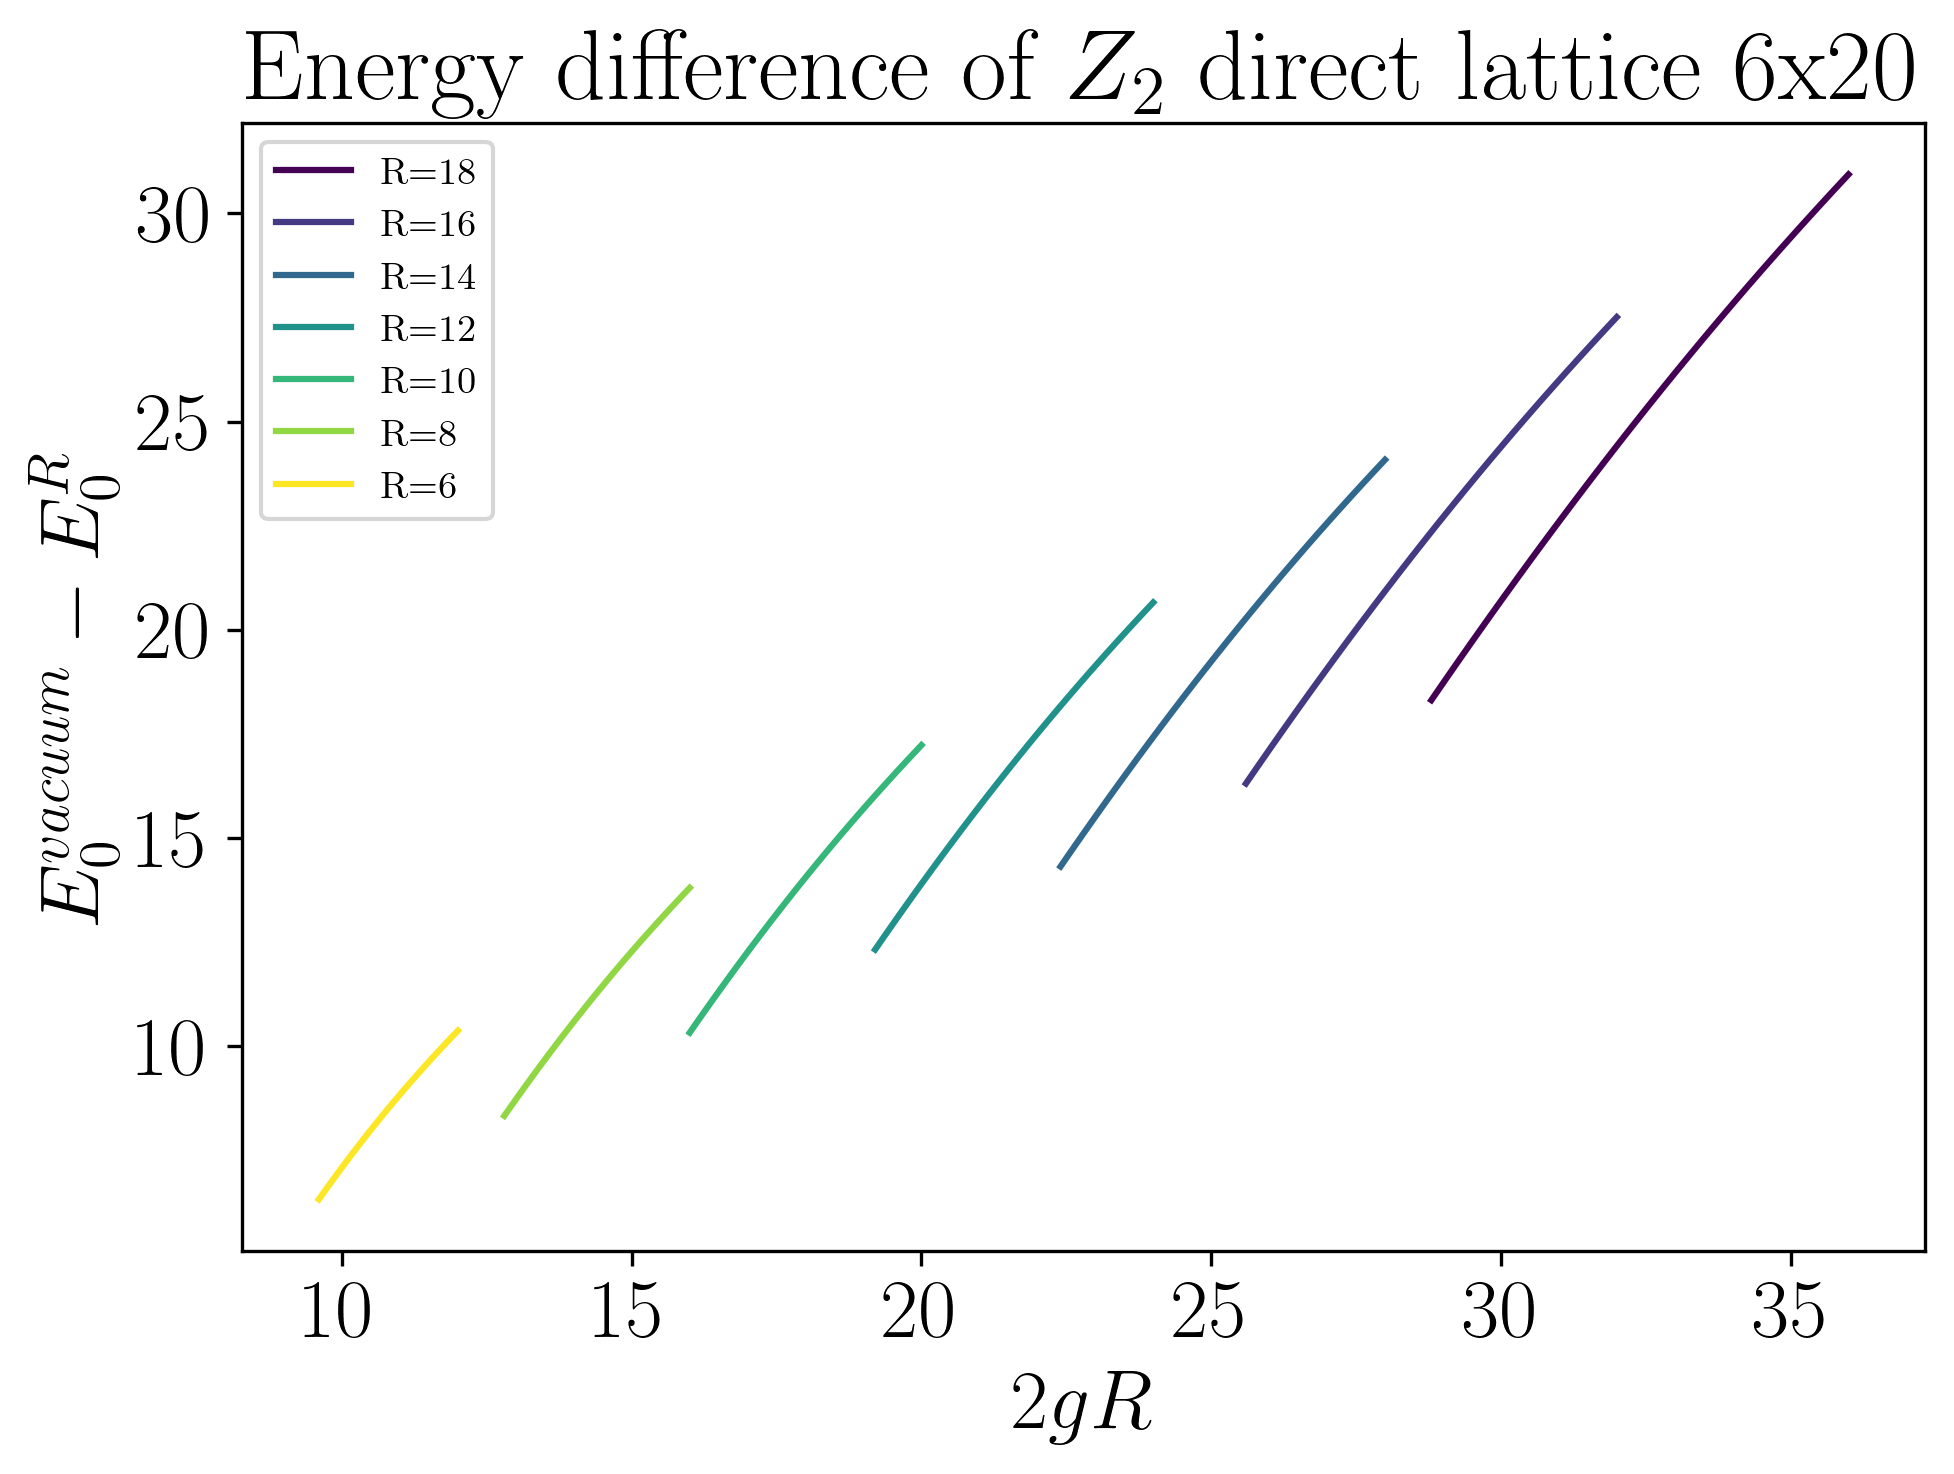

In [8]:
# L, l, chi, h_i, h_f, npoints = 50, 6, 128, 0.8, 1.0, 30
# cxs = [[7,43],[8,42],[9,41],[10,40],[11,39],[12,38],[13,37]]

# L, l, chi, h_i, h_f, npoints = 40, 6, 64, 0.5, 1.5, 50
# cxs = [[3,37],[4,36],[5,35],[6,34],[7,33],[8,32],[9,31],[10,30]]
# cxs = [[1,39],[2,38],[3,37],[4,36],[5,35],[6,34],[7,33],[8,32],
#        [9,31],[10,30],[11,29],[12,28],[13,27],[14,26],[15,25],
#        [16,24],[17,23],[18,22],[19,21]]

# L, l, chi, h_i, h_f, npoints = 40, 6, 128, 0.8, 1.0, 30
# cxs = [[5,35],[6,34],[7,33],[8,32],[9,31],[10,30]]

# L, l, chi, h_i, h_f, npoints = 30, 6, 128, 0.8, 1.0, 30
# cxs = [[3,27],[4,26],[5,25],[6,24],[7,23],[8,22],[9,21]]

L, l, chi, h_i, h_f, npoints = 20, 6, 64, 0.5, 1.5, 50
cxs = [[1,19],[2,18],[3,17],[4,16],[5,15],[6,14],[7,13],[8,12],[9,11]]
# cxs = [[4,16],[5,15],[6,14],[7,13],[8,12],[9,11]]

L, l, chi, h_i, h_f, npoints = 20, 6, 64, 0.8, 1.0, 30
cxs = [[1,19],[2,18],[3,17],[4,16],[5,15],[6,14],[7,13]]
boundcond = "pbc"

ends = plot_energy_difference_gr(L,l,chi,h_i,h_f,npoints,cxs,cy)

In [180]:
def plot_static_potential(L, l, chi, h_i, h_f, npoints, cxs, cy, idxs, plot=True):
    hs = np.linspace(h_i,h_f,npoints)
    e_h = []
    rs = []
    for i, h in enumerate(hs):        
        if h in hs[idxs]:
            for j, cx in enumerate(cxs):
                energy_charges = np.load(f"{parent_path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_{sector}_bc_{boundcond}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
                energy_vacuum = np.load(f"{parent_path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_vacuum_sector_bc_{boundcond}_None-None_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
                e_r = energy_charges[i] - energy_vacuum[i]
                e_h.append(e_r)
                rs.append(np.abs(cx[-1] - cx[0]))
            if plot:
                plt.plot(rs, e_h, color='firebrick', marker='o', label=f"g={round(h,2)}")
    if plot:
        # plt.yscale('log')
        plt.title(f"Static Potential of $Z_2$ direct lattice ${l}$x${L}$")
        plt.xlabel("Fluxtube length (R)")
        plt.ylabel("Static potential V(R,g)")
        plt.legend()
        plt.savefig(f"{parent_path}/figures/energy/static_potential_for_some_electric_strings_Z2_dual_direct_lattice_{l}x{L}_bc_{boundcond}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.png")
    return e_h, rs

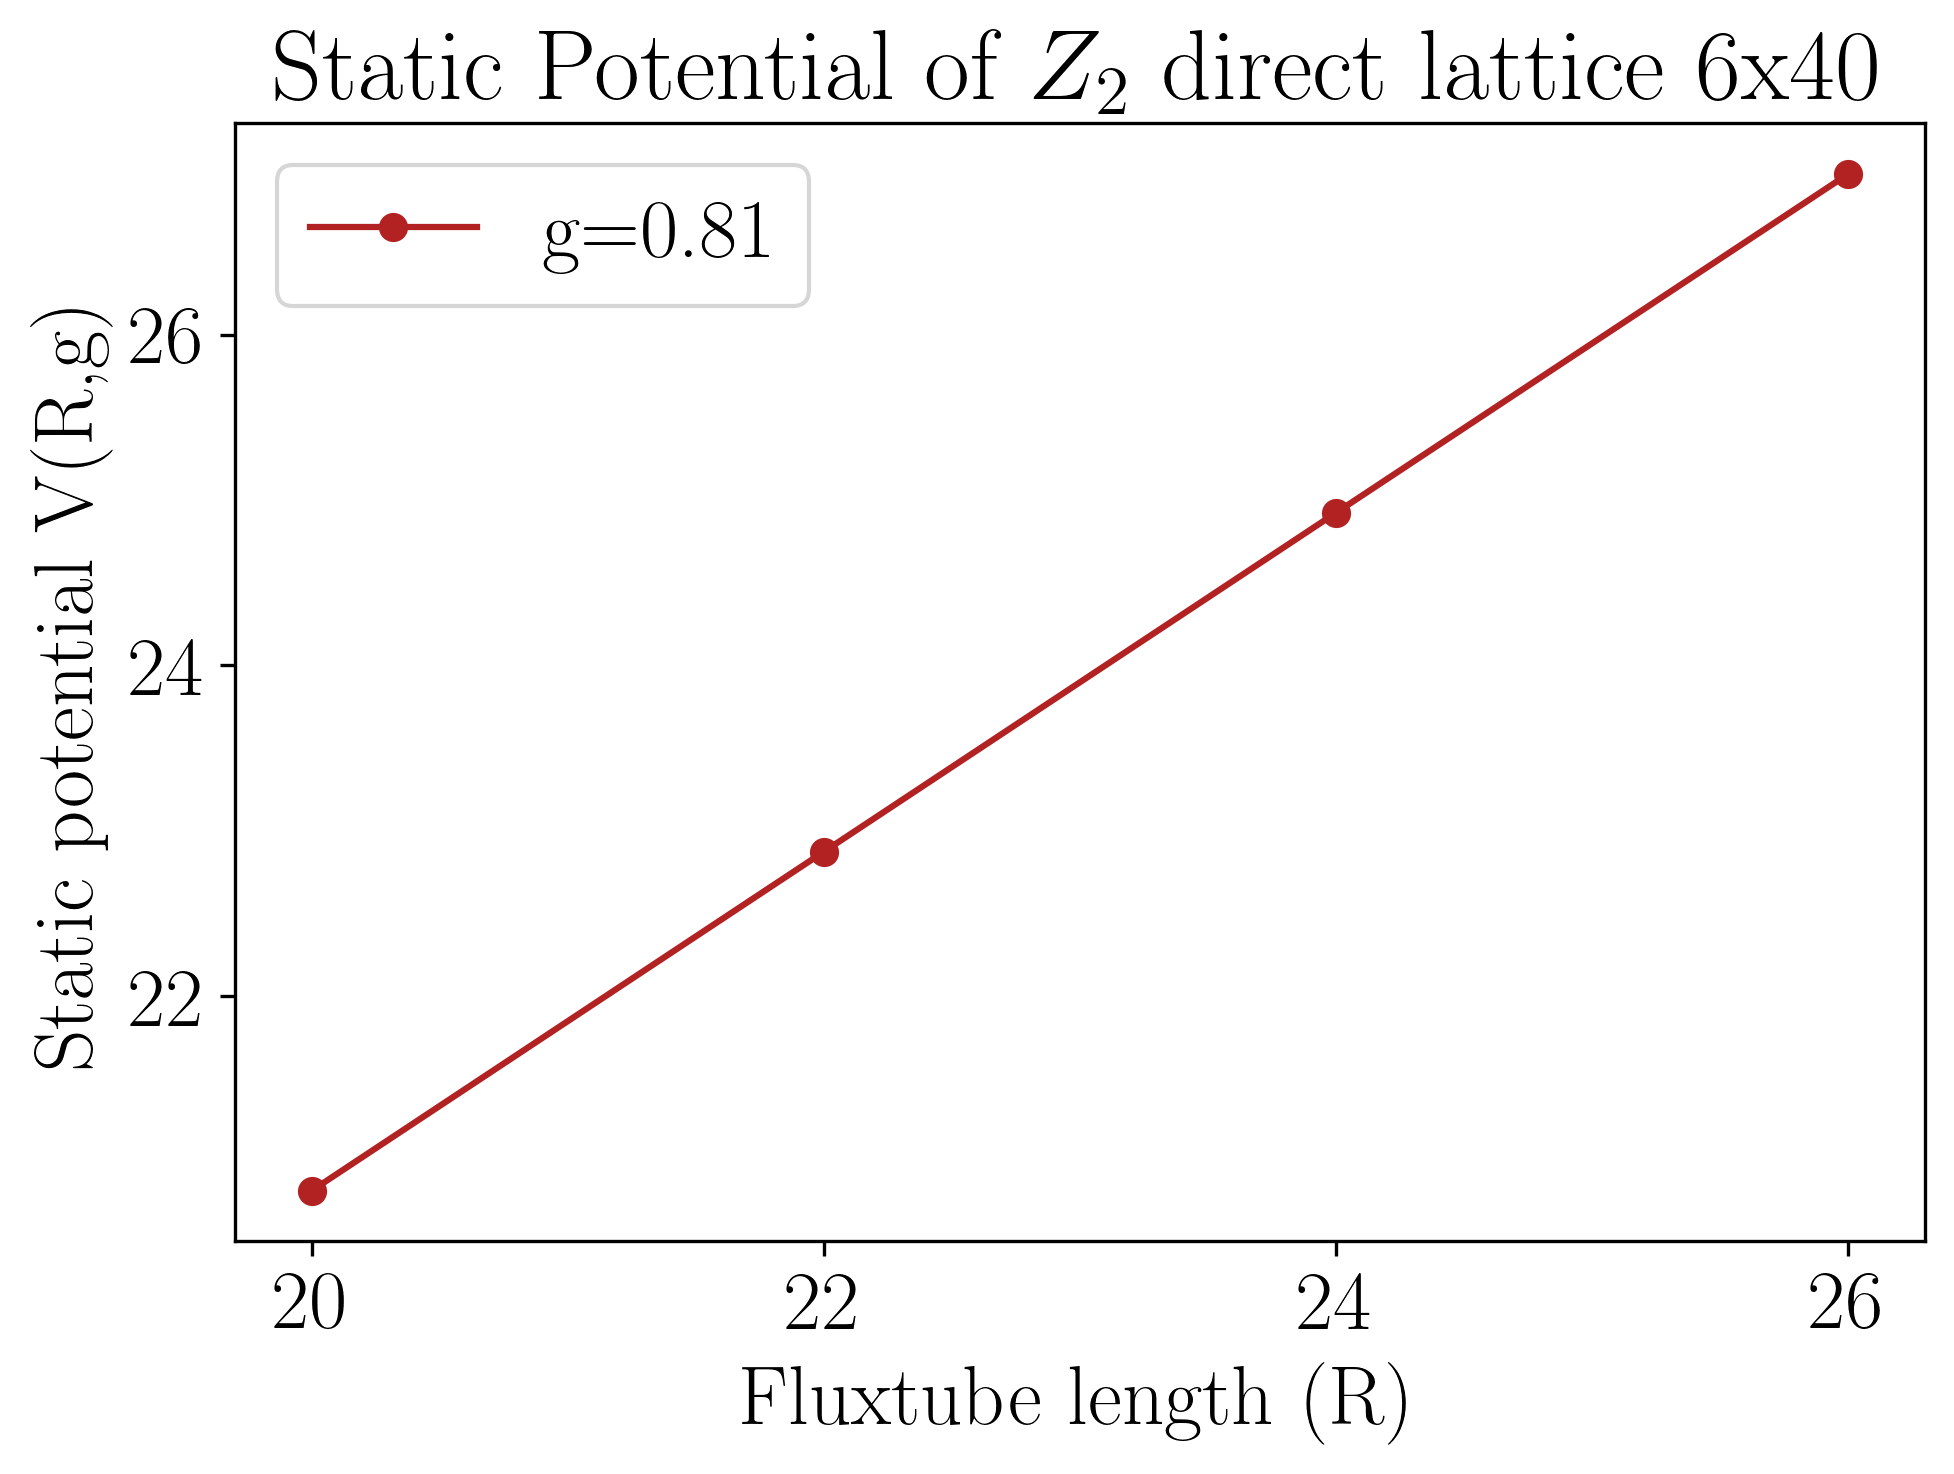

In [120]:
idxs =[15]
stpot, rs = plot_static_potential(L,l,chi,h_i,h_f,npoints,cxs,cy,idxs)

## Computing the Derivative

<>:5: SyntaxWarning: invalid escape sequence '\g'
<>:5: SyntaxWarning: invalid escape sequence '\g'
C:\Users\HP\AppData\Local\Temp\ipykernel_20052\2958318134.py:5: SyntaxWarning: invalid escape sequence '\g'
  plt.hlines(y=-np.pi/24, xmin=rs[0], xmax=rs[-1], linestyles='--', colors='r', label="$\gamma_{th}$")


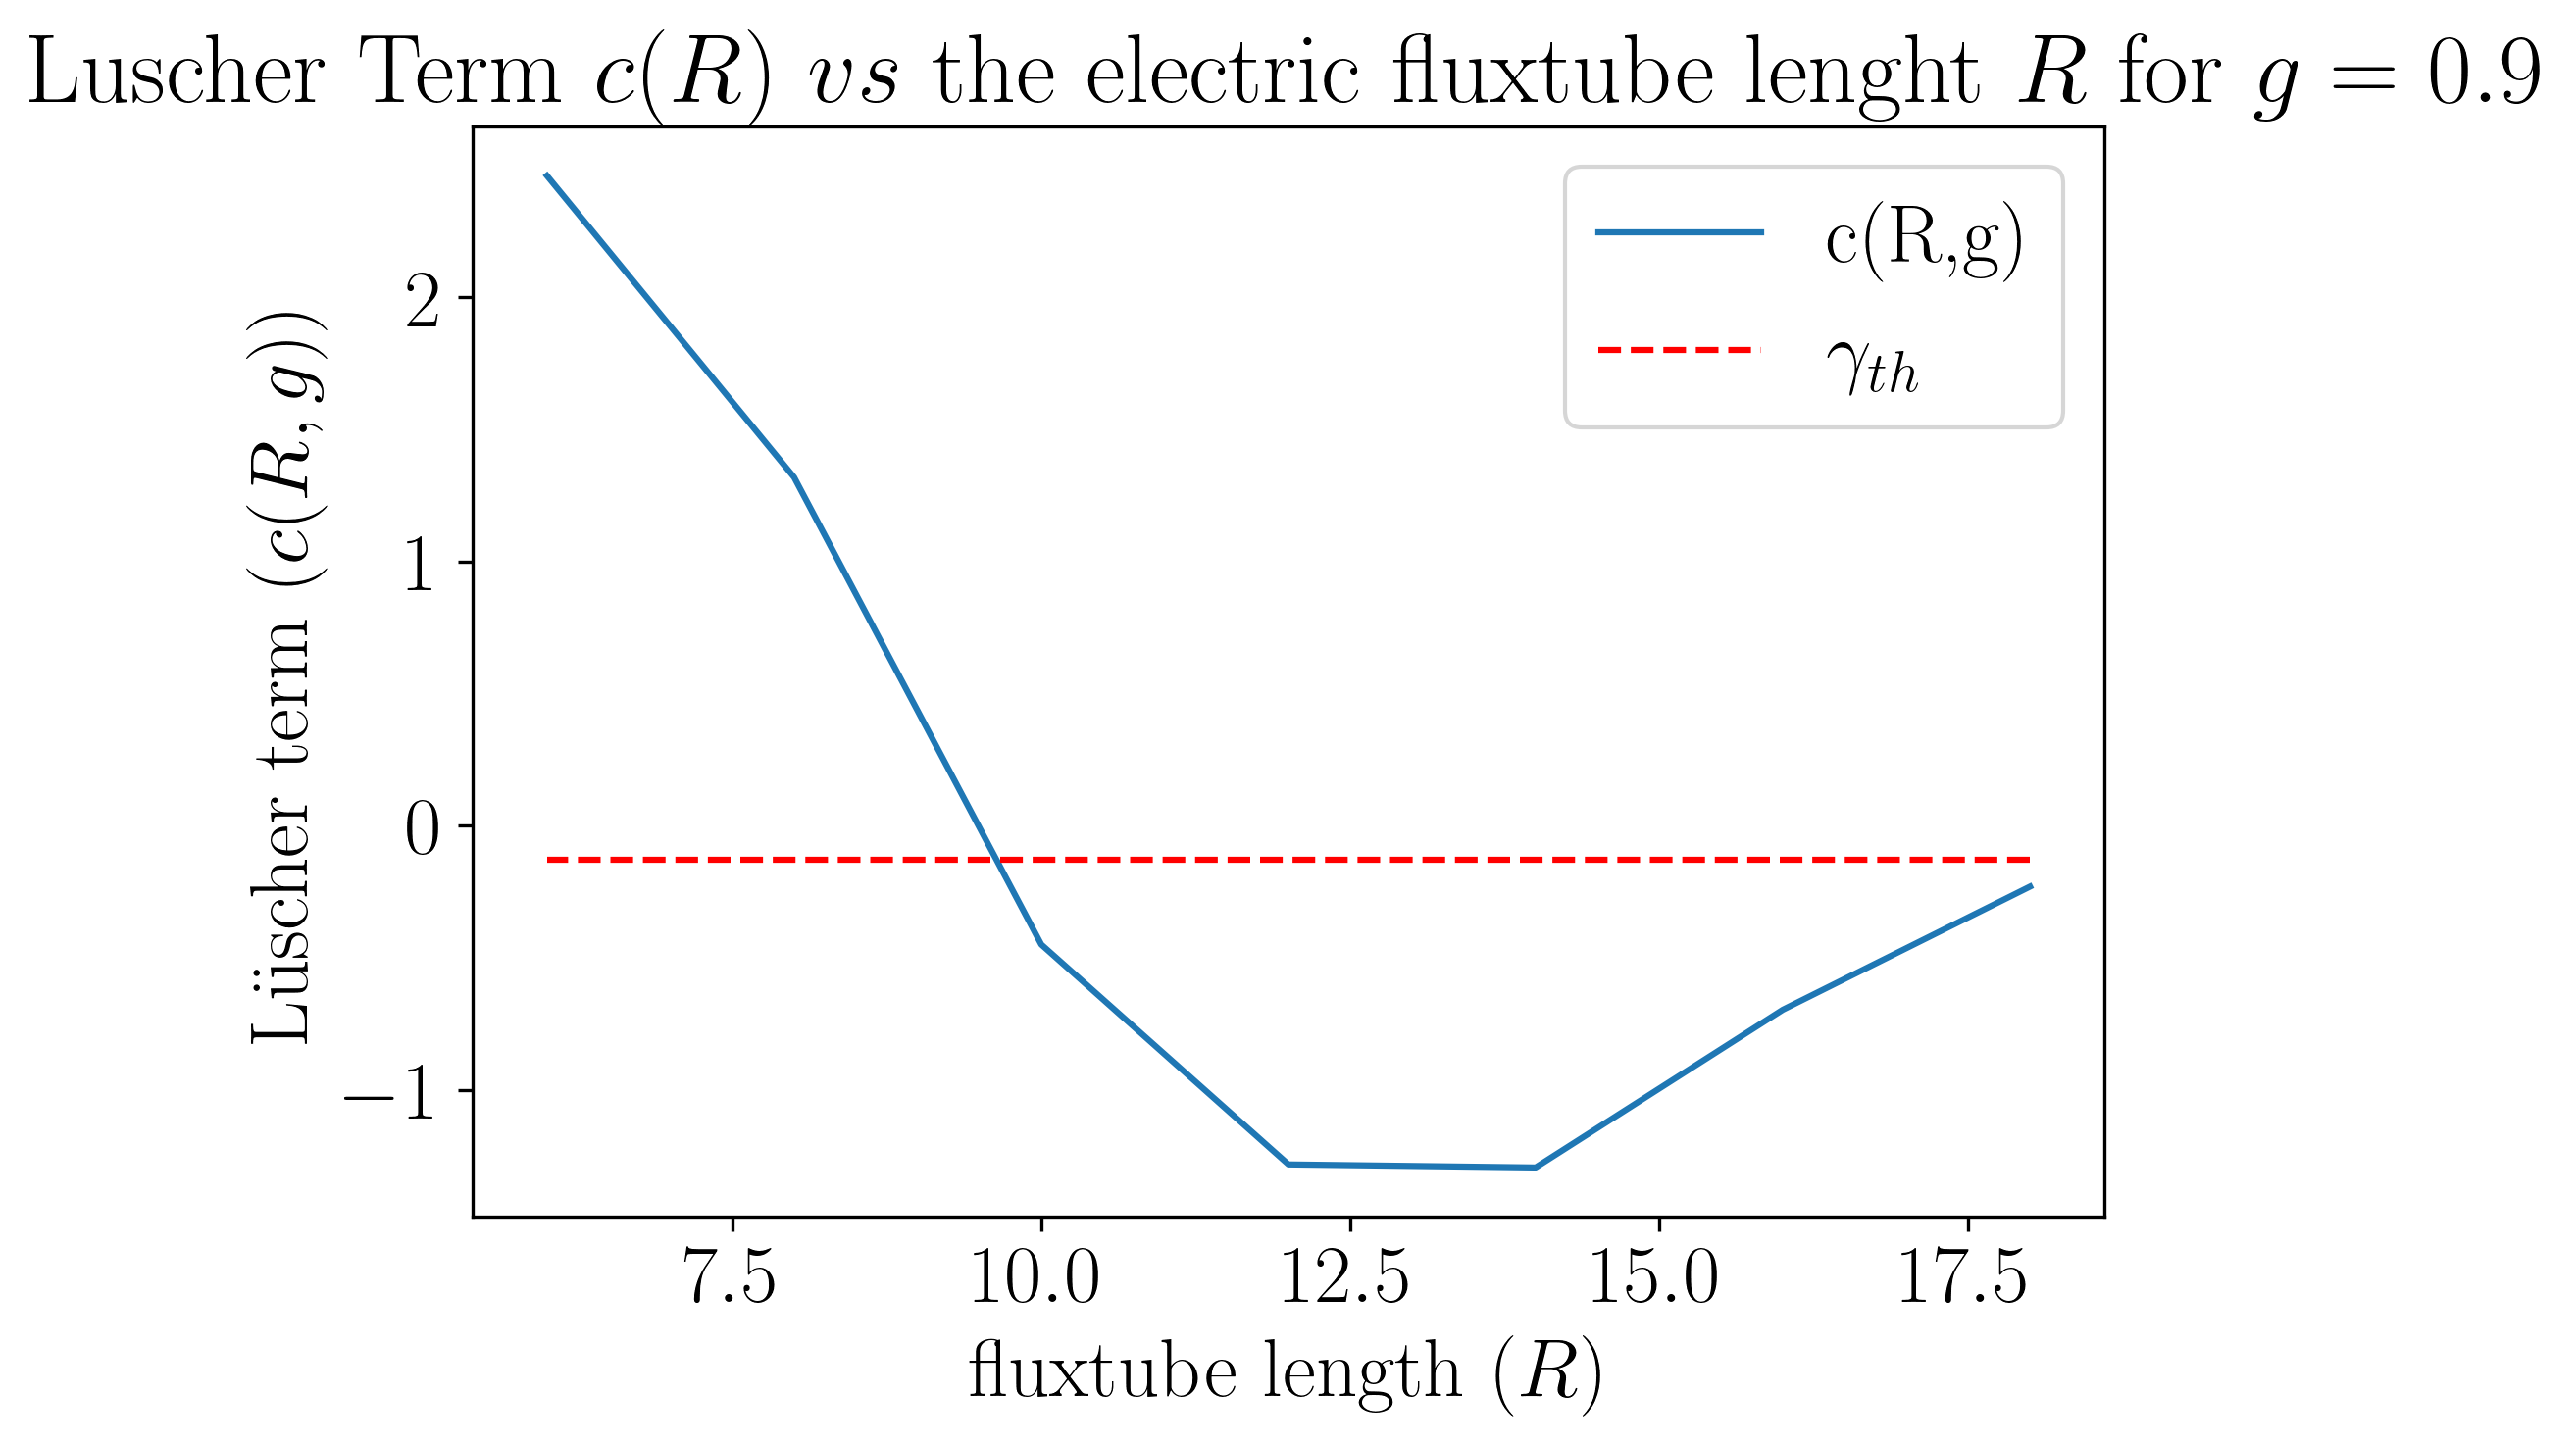

In [11]:
hs = np.linspace(h_i,h_f,npoints)
h_r = round(hs[idxs[0]],2)
const = (1/2) * (np.array(rs)**3) * np.gradient(np.gradient(stpot))
plt.plot(rs, const[::-1], label="c(R,g)")
plt.hlines(y=-np.pi/24, xmin=rs[0], xmax=rs[-1], linestyles='--', colors='r', label="$\gamma_{th}$")
plt.title(f"Luscher Term $c(R)$ $vs$ the electric fluxtube lenght $R$ for $g={h_r}$")
plt.xlabel("fluxtube length $(R)$")
plt.ylabel("Lüscher term $(c(R,g))$")
plt.legend()

plt.savefig(f"{parent_path}/figures/fluxtube/luscher_term_for_h_{h_r}_func_R_Z2_dual_direct_lattice_{l}x{L}_bc_{boundcond}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.png")

In [12]:
[c for c in const][-1]

-0.23092750639796122

In [13]:
-np.pi/12

-0.2617993877991494

In [14]:
hs = np.linspace(h_i,h_f,npoints)
idx = -2
const_h = []
for i, h in enumerate(hs):
    idxs =[i]
    stpot, rs = plot_static_potential(L,l,chi,h_i,h_f,npoints,cxs,cy,idxs, plot=False)
    const = ((1/2) * (np.array(rs)**3) * np.gradient(np.gradient(stpot)))[idx]
    const_h.append(const)

<>:3: SyntaxWarning: invalid escape sequence '\g'
<>:4: SyntaxWarning: invalid escape sequence '\g'
<>:3: SyntaxWarning: invalid escape sequence '\g'
<>:4: SyntaxWarning: invalid escape sequence '\g'
C:\Users\HP\AppData\Local\Temp\ipykernel_20052\3778135337.py:3: SyntaxWarning: invalid escape sequence '\g'
  plt.hlines(y=-np.pi/24, xmin=hs[0], xmax=hs[-1], linestyles='--', colors='r', label="$\gamma_{th}$")
C:\Users\HP\AppData\Local\Temp\ipykernel_20052\3778135337.py:4: SyntaxWarning: invalid escape sequence '\g'
  plt.hlines(y=-np.pi/12, xmin=hs[0], xmax=hs[-1], linestyles='-.', colors='r', label="$2\gamma_{th}$")


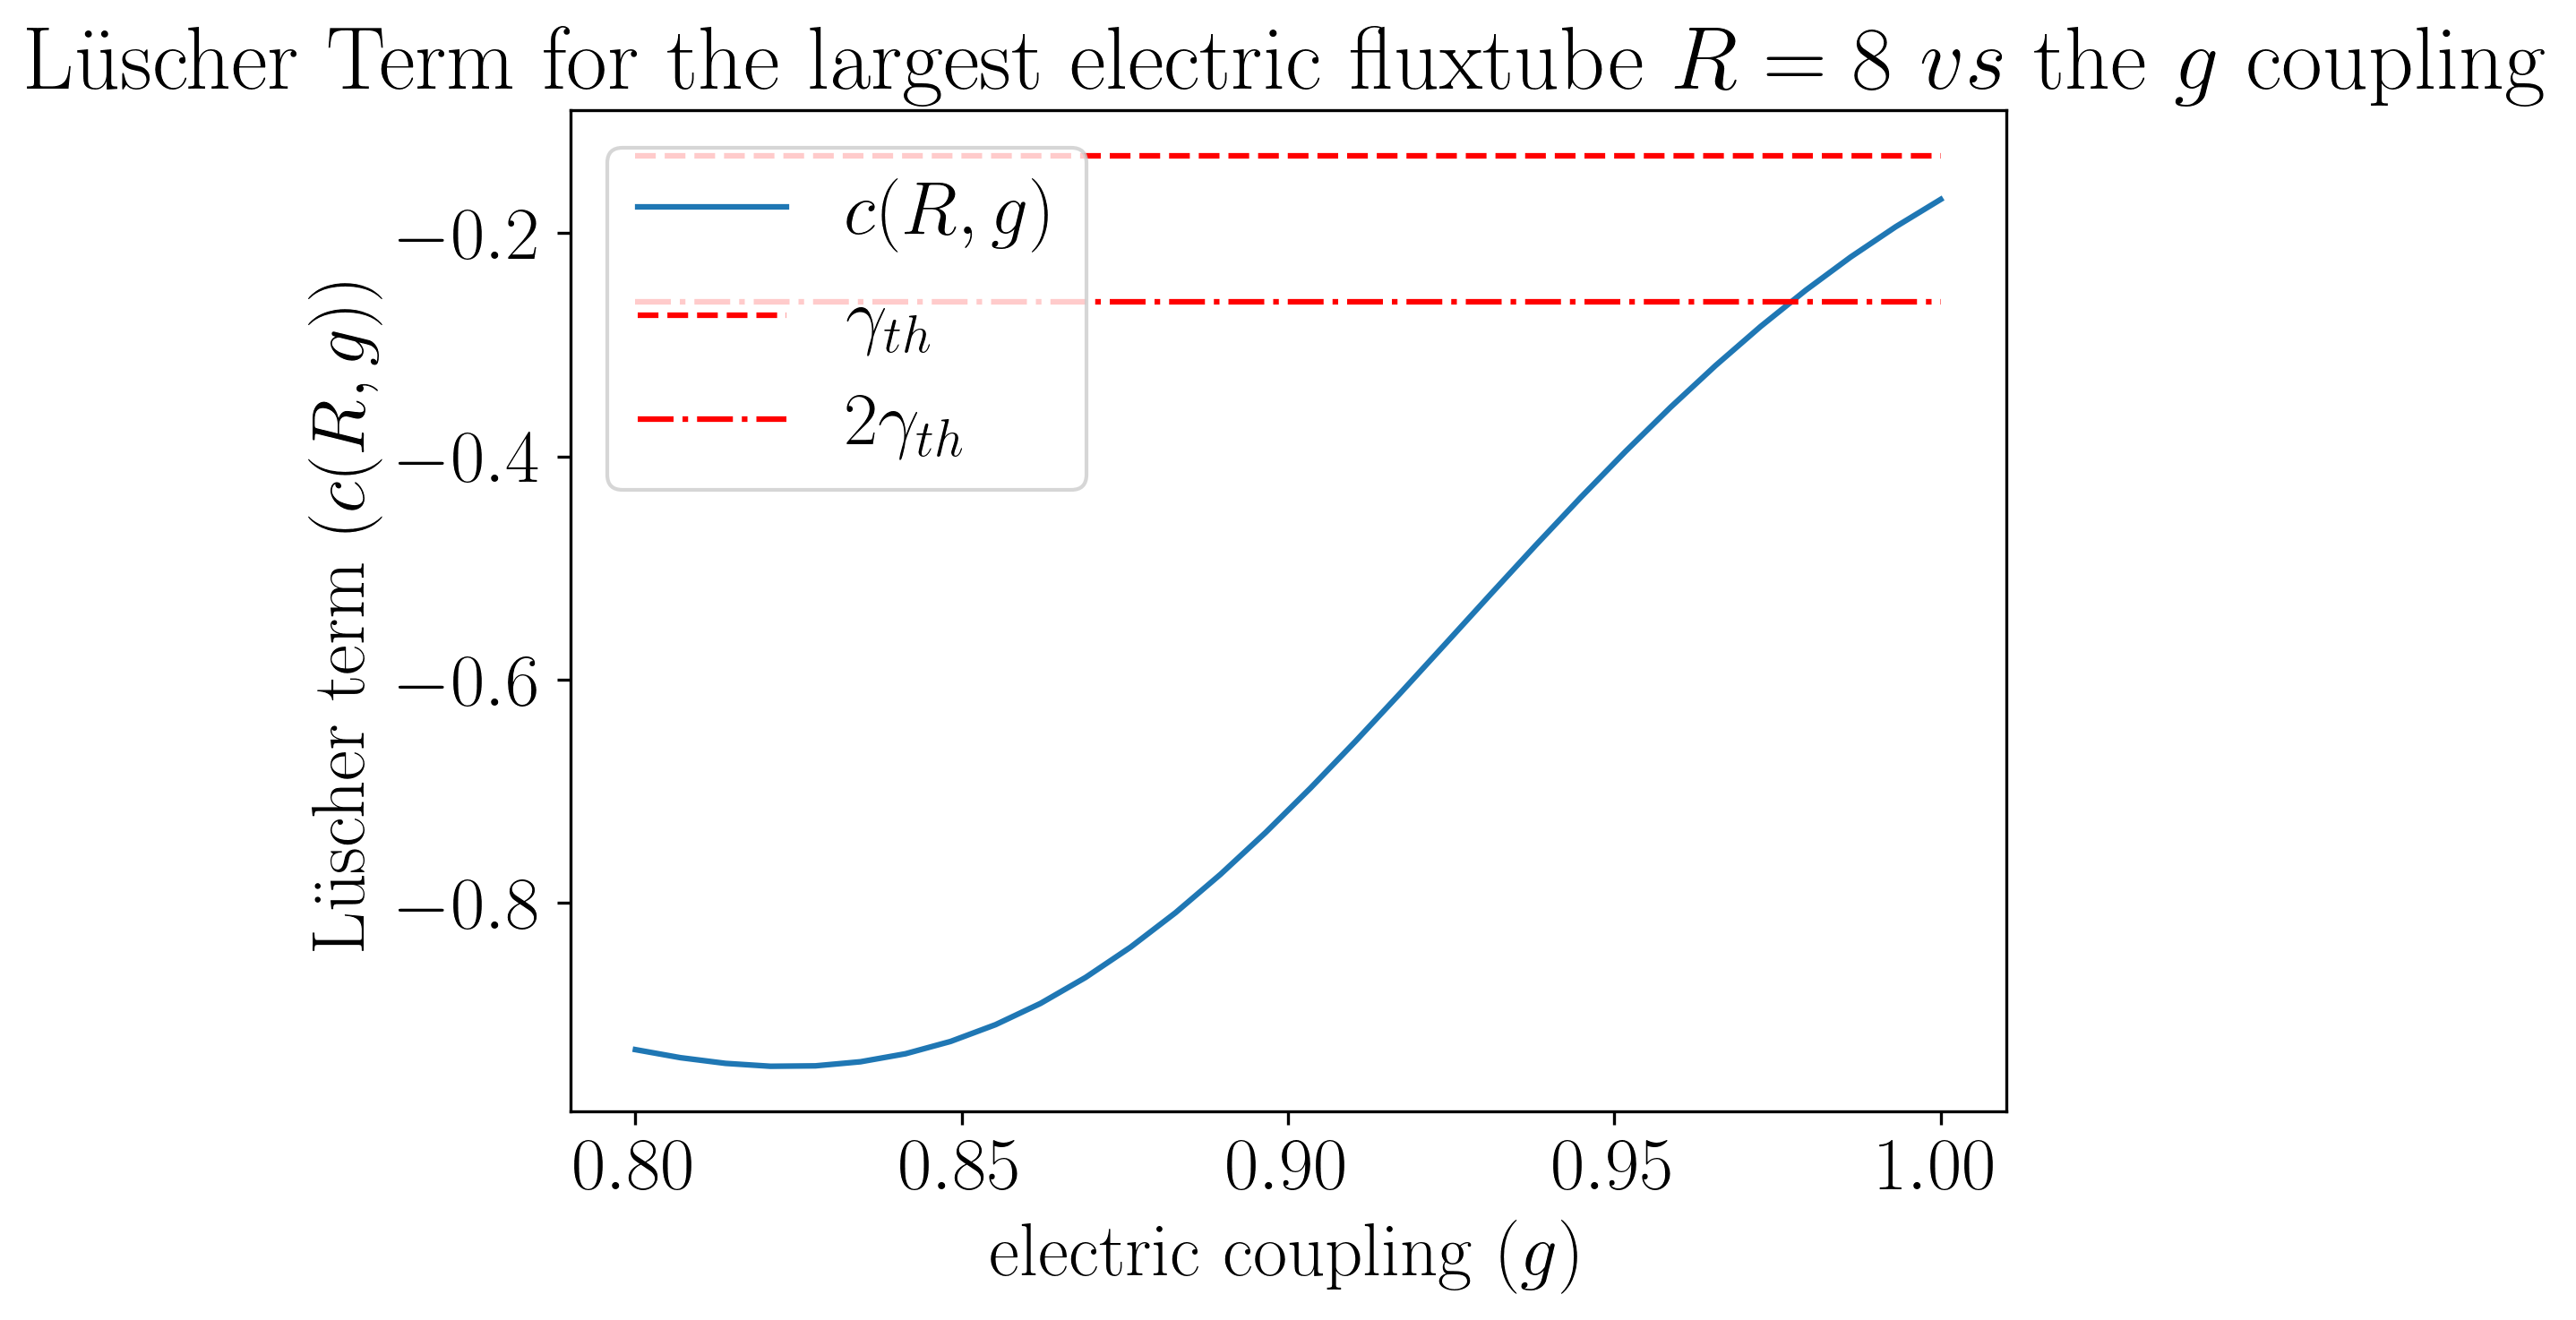

In [15]:
largest_R = np.abs(cxs[idx][0]-cxs[idx][1])
plt.plot(hs, const_h, label='$c(R,g)$')
plt.hlines(y=-np.pi/24, xmin=hs[0], xmax=hs[-1], linestyles='--', colors='r', label="$\gamma_{th}$")
plt.hlines(y=-np.pi/12, xmin=hs[0], xmax=hs[-1], linestyles='-.', colors='r', label="$2\gamma_{th}$")
plt.title(f"Lüscher Term for the largest electric fluxtube $R={largest_R}$ $vs$ the $g$ coupling")
plt.xlabel("electric coupling $(g)$")
plt.ylabel("Lüscher term $(c(R,g))$")
plt.legend()
plt.savefig(f"{parent_path}/figures/fluxtube/luscher_term_for_R_{largest_R}_func_g_Z2_dual_direct_lattice_{l}x{L}_bc_{boundcond}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.png")

<>:14: SyntaxWarning: invalid escape sequence '\g'
<>:14: SyntaxWarning: invalid escape sequence '\g'
C:\Users\HP\AppData\Local\Temp\ipykernel_20052\2995373871.py:14: SyntaxWarning: invalid escape sequence '\g'
  plt.hlines(y=-np.pi/24, xmin=hs[0], xmax=hs[-1], linestyles='--', colors='r', label="$\gamma_{th}$")


R:18, min:0.8731769506584897, luscher:-0.131, 2*luscher:-0.262, g_min:1.000
R:16, min:0.5531817334558582, luscher:-0.131, 2*luscher:-0.262, g_min:1.000
R:14, min:-0.4542562140480584, luscher:-0.131, 2*luscher:-0.262, g_min:0.910
R:12, min:-1.5227083856514128, luscher:-0.131, 2*luscher:-0.262, g_min:0.855
R:10, min:-1.680029124422333, luscher:-0.131, 2*luscher:-0.262, g_min:0.834
R:8, min:-0.9461965659647831, luscher:-0.131, 2*luscher:-0.262, g_min:0.821
R:6, min:-0.3200940755759234, luscher:-0.131, 2*luscher:-0.262, g_min:0.821


(-2.0, 0.2)

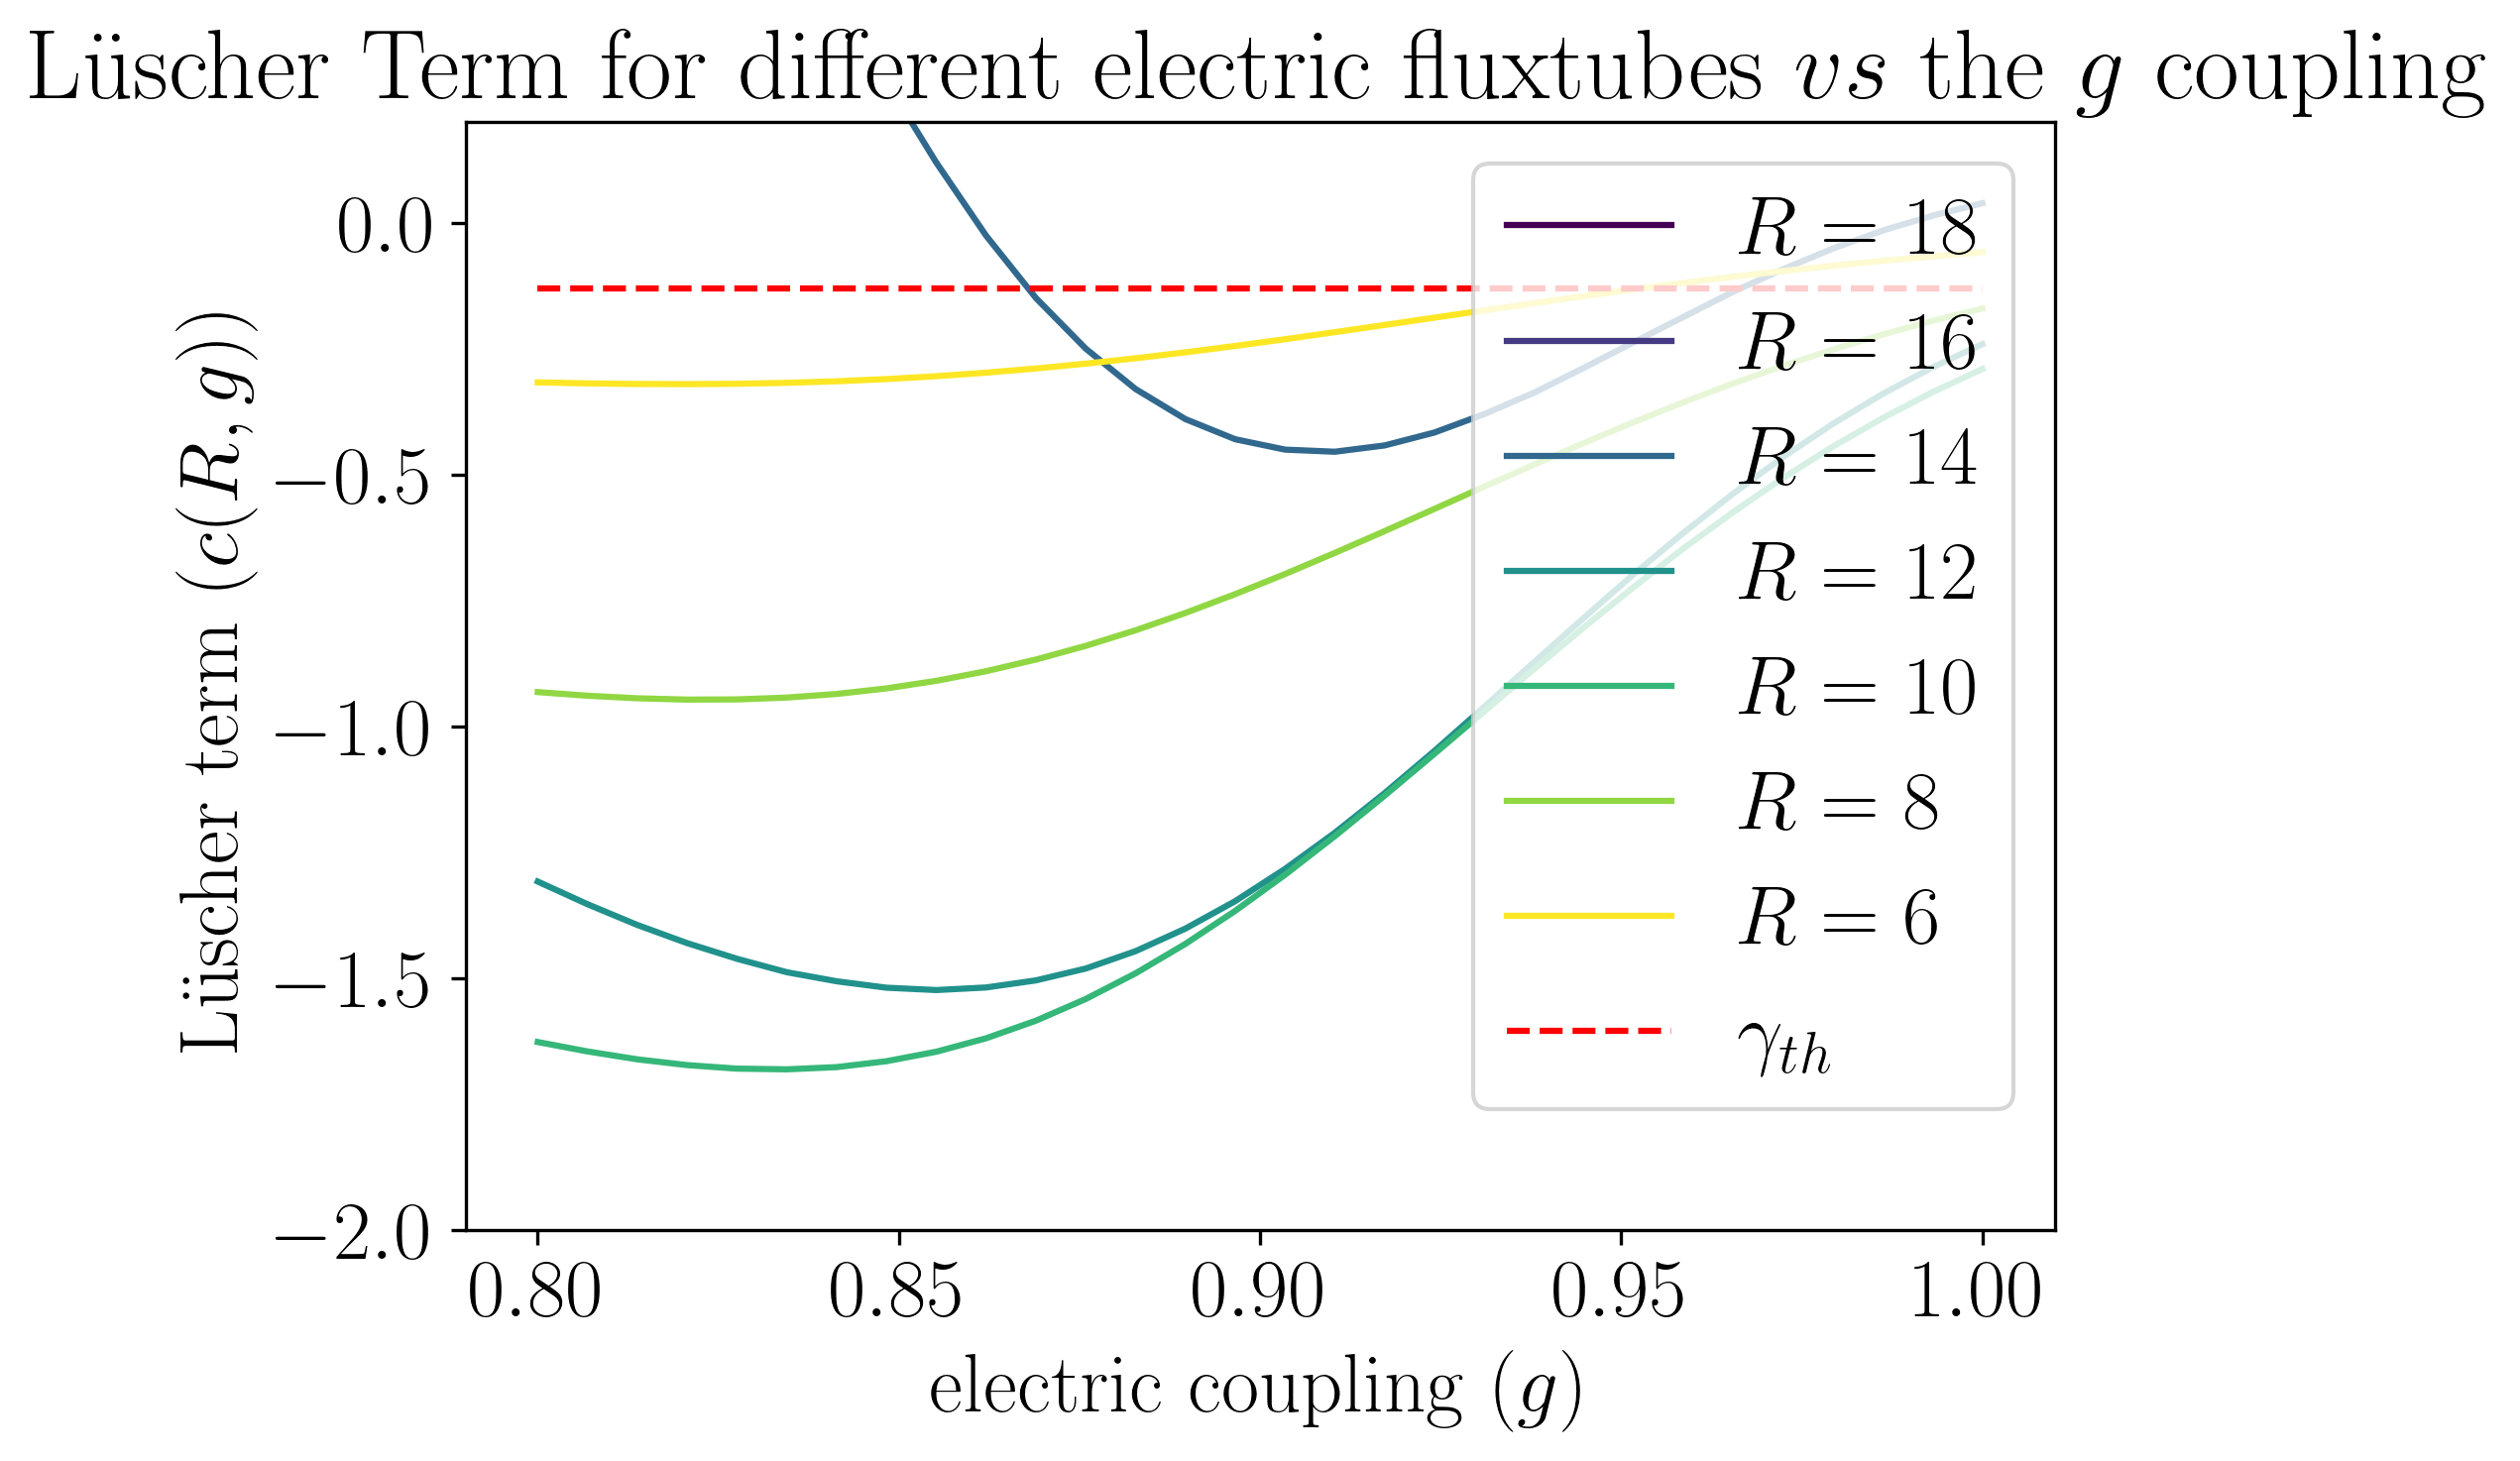

In [21]:
hs = np.linspace(h_i,h_f,npoints)
idx = -6
colors = create_sequential_colors(len(cxs))
for idx, cx in enumerate(cxs):
    const_h = []
    largest_R = np.abs(cxs[idx][0]-cxs[idx][1])
    for i, h in enumerate(hs):
        idxs =[i]
        stpot, rs = plot_static_potential(L,l,chi,h_i,h_f,npoints,cxs,cy,idxs, plot=False)
        const = ((1/2) * (np.array(rs)**3) * np.gradient(np.gradient(stpot)))[idx]
        const_h.append(const)
    print(f"R:{largest_R}, min:{min(const_h)}, luscher:{-np.pi/24:.3f}, 2*luscher:{-np.pi/12:.3f}, g_min:{hs[int(np.argmin(const_h))]:.3f}" )
    plt.plot(hs, const_h, color=colors[idx], label=f'$R={largest_R}$')
plt.hlines(y=-np.pi/24, xmin=hs[0], xmax=hs[-1], linestyles='--', colors='r', label="$\gamma_{th}$")
plt.title(f"Lüscher Term for different electric fluxtubes $vs$ the $g$ coupling")
plt.xlabel("electric coupling $(g)$")
plt.ylabel("Lüscher term $(c(R,g))$")
plt.legend(loc="upper right")
plt.ylim((-2,0.2))
# plt.savefig(f"{parent_path}/figures/fluxtube/luscher_term_for_different_R_func_g_Z2_dual_direct_lattice_{l}x{L}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.png")

## Fitting the potential

In [81]:
L, l, chi, h_i, h_f, npoints = 20, 6, 32, 0.5, 1.5, 50
cxs = [[1,19],[2,18],[3,17],[4,16],[5,15],[6,14],[7,13],[8,12],[9,11]]
# cxs = [[4,16],[5,15],[6,14],[7,13]]

L, l, chi, h_i, h_f, npoints = 20, 6, 64, 0.8, 1.0, 30
cxs = [[1,19],[2,18],[3,17],[4,16],[5,15],[6,14],[7,13]]
boundcond = "pbc"

L, l, h_i, h_f, npoints, chi = 30, 6, 0.8, 1.0, 30, 128
cxs = [[3,27],[4,26],[5,25],[6,24],[7,23],[8,22],[9,21]]
cxs = [[3,27],[4,26],[5,25],[6,24]] # largest
# cxs = [[6,24],[7,23],[8,22],[9,21]] # smallest
boundcond = "obc"

# L, l, h_i, h_f, npoints, chi = 30, 6, 0.6, 1.2, 51, 32
# cxs = [[3,27],[4,26],[5,25],[6,24],[7,23],[8,22],[9,21]]
# # cxs = [[3,27],[4,26],[5,25],[6,24]] # largest
# # cxs = [[6,24],[7,23],[8,22],[9,21]] # smallest
# boundcond = "obc"

# L, l, h_i, h_f, npoints, chi = 30, 6, 0.8, 1.0, 30, 64
# cxs = [[3,27],[4,26],[5,25],[6,24],[7,23],[8,22],[9,21],[10,20]]
# cxs = [[3,27],[4,26],[5,25],[6,24]] # largest
# cxs = [[7,23],[8,22],[9,21],[10,20]] # smallest
# boundcond = "pbc"

# L, l, chi, h_i, h_f, npoints = 40, 6, 64, 0.5, 1.5, 50
# cxs = [[9,31],[10,30],[11,29],[12,28],[13,27]] # r_min = 14, r_max = 22
# cxs = [[1,39],[2,38],[3,37],[4,36],[5,35],[6,34],[7,33],[8,32],
#        [9,31],[10,30],[11,29],[12,28],[13,27],[14,26],[15,25],
#        [16,24],[17,23],[18,22],[19,21]] # all
# cxs = [[5,35],[6,34],[7,33],[8,32],[9,31],[10,30]] # r_min = 20, r_max = 30

# L, l, chi, h_i, h_f, npoints = 40, 6, 128, 0.8, 1.0, 30
# cxs = [[2,38],[3,37],[4,36],[5,35],[6,34],[7,33],[8,32],[9,31],[10,30]]
# # cxs = [[6,34],[7,33],[8,32],[9,31],[10,30]]
# cxs = [[5,35],[6,34],[7,33],[8,32],[9,31],[10,30]]

# L, l, chi, h_i, h_f, npoints = 40, 6, 64, 0.8, 1.0, 30
# cxs = [[4,36],[5,35],[6,34],[7,33],[8,32],[9,31],[10,30]]
# cxs = [[7,33],[8,32],[9,31],[10,30]]
# # cxs = [[4,36],[5,35],[6,34],[7,33]]
# boundcond = "pbc"

# L, l, chi, h_i, h_f, npoints = 50, 6, 128, 0.8, 1.0, 30
# cxs = [[7,43],[8,42],[9,41],[10,40],[11,39],[12,38],[13,37]]

hs = np.linspace(h_i,h_f,npoints)

In [82]:
def luscher_law(r, sigma, mu, gamma):
    return sigma*r + mu + gamma/r

def luscher_term_at_roughening(L,l,chi,h_i,h_f,npoints,cxs,cy):
    gammas = []
    for i in range(npoints):
        idxs =[i]
        stpot, rs = plot_static_potential(L,l,chi,h_i,h_f,npoints,cxs,cy,idxs, plot=False)
        plu, clu = curve_fit(luscher_law, rs, stpot)
        gammas.append(plu[2])
    
    idx_g_r = np.argmin(gammas)
    hs = np.linspace(h_i,h_f,npoints)
    return min(gammas), gammas, hs[idx_g_r]

<>:2: SyntaxWarning: invalid escape sequence '\g'
<>:4: SyntaxWarning: invalid escape sequence '\g'
<>:7: SyntaxWarning: invalid escape sequence '\g'
<>:2: SyntaxWarning: invalid escape sequence '\g'
<>:4: SyntaxWarning: invalid escape sequence '\g'
<>:7: SyntaxWarning: invalid escape sequence '\g'
C:\Users\HP\AppData\Local\Temp\ipykernel_20052\2879942919.py:2: SyntaxWarning: invalid escape sequence '\g'
  plt.plot(hs, gammas, label='$\gamma(R,g)$')
C:\Users\HP\AppData\Local\Temp\ipykernel_20052\2879942919.py:4: SyntaxWarning: invalid escape sequence '\g'
  plt.hlines(y=-np.pi/12, xmin=hs[0], xmax=hs[-1], linestyles='-.', colors='r', label="$2\gamma_{th}$")
C:\Users\HP\AppData\Local\Temp\ipykernel_20052\2879942919.py:7: SyntaxWarning: invalid escape sequence '\g'
  plt.ylabel("Lüscher term $(\gamma(R,g))$")


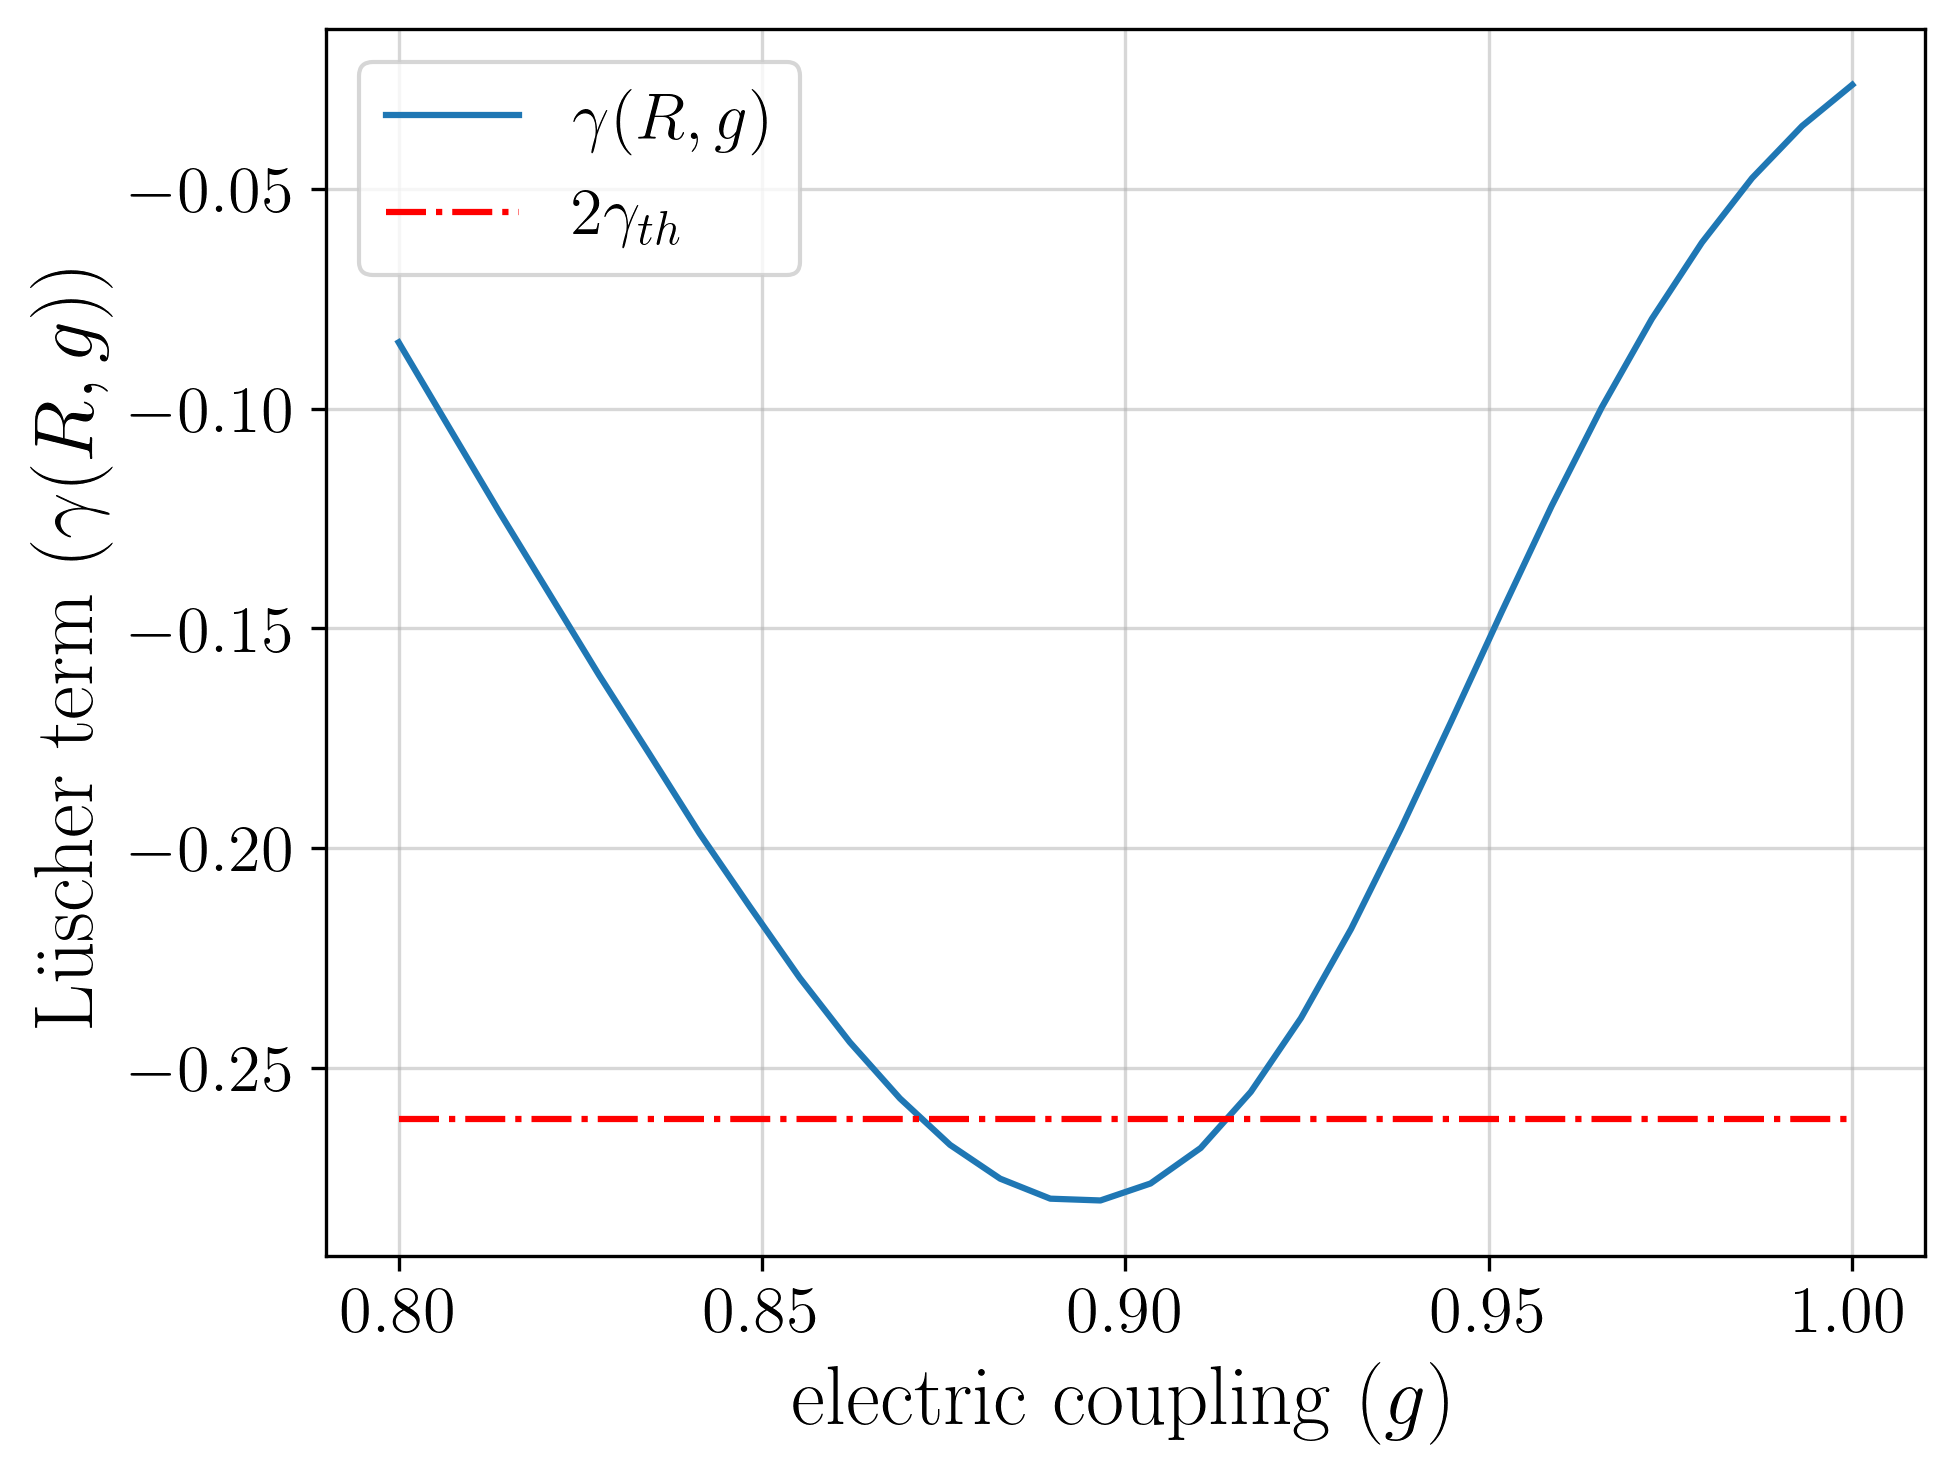

In [83]:
luscher_term, gammas, g_r = luscher_term_at_roughening(L,l,chi,h_i,h_f,npoints,cxs,cy)
plt.plot(hs, gammas, label='$\gamma(R,g)$')
# plt.hlines(y=-np.pi/24, xmin=hs[0], xmax=hs[-1], linestyles='--', colors='r', label="$\gamma_{th}$")
plt.hlines(y=-np.pi/12, xmin=hs[0], xmax=hs[-1], linestyles='-.', colors='r', label="$2\gamma_{th}$")
# plt.title(f"Lüscher Term $vs$ the $g$ coupling: $R\in[{int(cxs[-1][1]-cxs[-1][0])},{int(cxs[0][1]-cxs[0][0])}]$")
plt.xlabel("electric coupling $(g)$")
plt.ylabel("Lüscher term $(\gamma(R,g))$")
plt.grid(True, alpha=0.5)
plt.legend(fontsize=16)
plt.tick_params(axis='both', labelsize=16)
# plt.xlim((0.7,1.5))
# plt.ylim((-0.3,0.3))
plt.savefig(f"{parent_path}/figures/fluxtube/luscher_term_fit_string_R_{int(cxs[-1][1]-cxs[-1][0])}-{int(cxs[0][1]-cxs[0][0])}_Z2_dual_direct_lattice_{l}x{L}_bc_{boundcond}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.png")

### Generalize the fitting process

In [25]:
def get_luscher_terms_vs_strings(cxs, start_index):
    luscher_terms = []
    gs_roughening = []
    last_four_distances = cxs[start_index-4:start_index]
    Rs = [int(np.abs(r[0]-r[1])) for r in last_four_distances]
    Rs.reverse()
    print(f"R: {Rs}")
    luscher_term, gammas, g_r = luscher_term_at_roughening(L,l,chi,h_i,h_f,npoints,last_four_distances,cy)
    print(luscher_term)
    luscher_terms.append(luscher_term)
    gs_roughening.append(g_r)
    for i in range(start_index-5, -1, -1):
        distance = cxs[i]
        last_four_distances = [distance] + last_four_distances
        Rs = [int(np.abs(r[0]-r[1])) for r in last_four_distances]
        Rs.reverse()
        print(f"R: {Rs}")
        luscher_term, gammas, g_r = luscher_term_at_roughening(L,l,chi,h_i,h_f,npoints,last_four_distances,cy)
        print(luscher_term)
        luscher_terms.append(luscher_term)
        gs_roughening.append(g_r)
    return luscher_terms, last_four_distances, gs_roughening

In [153]:
# L, l, chi, h_i, h_f, npoints = 20, 6, 32, 0.5, 1.5, 50
# cxs = [[1,19],[2,18],[3,17],[4,16],[5,15],[6,14],[7,13],[8,12],[9,11]] # 6x20

L, l, chi, h_i, h_f, npoints = 20, 6, 64, 0.8, 1.0, 30
cxs = [[1,19],[2,18],[3,17],[4,16],[5,15],[6,14],[7,13]]
boundcond = "pbc"

L, l, h_i, h_f, npoints, chi = 30, 6, 0.8, 1.0, 30, 128
cxs = [[3,27],[4,26],[5,25],[6,24],[7,23],[8,22],[9,21]]

L, l, h_i, h_f, npoints, chi = 30, 6, 0.8, 1.0, 30, 64
cxs = [[3,27],[4,26],[5,25],[6,24],[7,23],[8,22],[9,21],[10,20]]
boundcond = "pbc"

# L, l, chi, h_i, h_f, npoints = 40, 6, 64, 0.5, 1.5, 50
# cxs = [[1,39],[2,38],[3,37],[4,36],[5,35],[6,34],[7,33],[8,32],
#        [9,31],[10,30],[11,29],[12,28],[13,27],[14,26],[15,25],
#        [16,24],[17,23],[18,22],[19,21]] # all 6x40
# cxs = [[2,38],[3,37],[4,36],[5,35],[6,34],[7,33],[8,32],
#        [9,31],[10,30]] # all 6x40
# L, l, chi, h_i, h_f, npoints = 40, 6, 128, 0.8, 1.0, 30
# cxs = [[4,36],[8,32],[9,31]]
# L, l, chi, h_i, h_f, npoints = 40, 6, 128, 0.8, 1.0, 30
# cxs = [[2,38],[3,37],[4,36],[5,35],[6,34],[7,33],[8,32],[9,31],[10,30]]

# cxs = [[2,38],[3,37],[4,36],[8,32],[9,31]]
# cxs = [[2,38],[3,37],[4,36],[6,34],[7,33],[8,32],[9,31],[10,30]]

L, l, chi, h_i, h_f, npoints = 40, 6, 64, 0.8, 1.0, 30
cxs = [[4,36],[5,35],[6,34],[7,33],[8,32],[9,31],[10,30]]
boundcond = "pbc"

L, l, chi, h_i, h_f, npoints = 50, 6, 128, 0.8, 1.0, 30
cxs = [[7,43],[8,42],[9,41],[10,40],[11,39],[12,38],[13,37]]
boundcond = "obc"

def closer_luscher_term(cxs: list, min_fit_points: int, plot_type: str, plot: bool):
    i = 0
    colors = create_sequential_colors(num_colors=len(cxs)-min_fit_points+1)
    cl_vals = []
    cl_Rs = []
    cl_gs = []
    if plot:
        if plot_type == "all":
            while len(cxs)-i >= min_fit_points:
                lts, lfd, gsr = get_luscher_terms_vs_strings(cxs, start_index=(len(cxs)-i))
                plt.title(f"Luscher terms")
                plt.plot(lts, color=colors[i], marker='1', linestyle='-', linewidth=1, label=f"from $R: {int(np.abs(lfd[-1][0]-lfd[-1][1]))}$")

                i+=1
            plt.xlabel("number of fit points")
            plt.xticks(ticks=range(len(cxs)-min_fit_points+1), labels=range(min_fit_points,len(cxs)+1))
            plt.hlines(y=-np.pi/12, xmin=0, xmax=len(cxs)-min_fit_points, linestyles='-.', colors='r', label="$2\gamma_{th}$")
            plt.legend(fontsize=10)
            plt.savefig(f"{parent_path}/figures/fluxtube/luscher_term_fit_string_all_Rs_Z2_dual_direct_lattice_{l}x{L}_bc_{boundcond}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.png")
        else:
            while len(cxs)-i >= min_fit_points:
                lts, lfd, gsr = get_luscher_terms_vs_strings(cxs, start_index=(len(cxs)-i))
                plt.title(f"Luscher terms from $R: {int(np.abs(lfd[-1][0]-lfd[-1][1]))}$")
                plt.plot(lts, '1', label="luscher terms")
                plt.hlines(y=-np.pi/12, xmin=0, xmax=len(lfd)-min_fit_points+1, linestyles='-.', colors='r', label="$2\gamma_{th}$")
                plt.xlabel("number of fit points")
                plt.xticks(ticks=range(len(lfd)-min_fit_points+1), labels=range(min_fit_points,len(lfd)+1))
                plt.legend()
                plt.savefig(f"{parent_path}/figures/fluxtube/luscher_term_fit_string_R_{int(lfd[-1][1]-lfd[-1][0])}_Z2_dual_direct_lattice_{l}x{L}_bc_{boundcond}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.png")
                plt.show()
                plt.close()
                i+=1
    else:
        while len(cxs)-i >= min_fit_points:
            lts, lfd, gsr = get_luscher_terms_vs_strings(cxs, start_index=(len(cxs)-i))
            closest_index, closest_value = min(enumerate(lts), key=lambda x: abs(x[1] - (-np.pi/12)))
            closest_Rs = [int(np.abs(lfd[-1][0]-lfd[-1][1])), int(np.abs(lfd[-min_fit_points-closest_index][0]-lfd[-min_fit_points-closest_index][1]))]
            closest_roughening = gsr[closest_index]
            print(closest_Rs, closest_value)
            cl_vals.append(closest_value)
            cl_Rs.append(closest_Rs)
            cl_gs.append(closest_roughening)
            i+=1

    return cl_Rs, cl_vals, cl_gs

<>:53: SyntaxWarning: invalid escape sequence '\g'
<>:61: SyntaxWarning: invalid escape sequence '\g'
<>:53: SyntaxWarning: invalid escape sequence '\g'
<>:61: SyntaxWarning: invalid escape sequence '\g'
C:\Users\HP\AppData\Local\Temp\ipykernel_20052\704451243.py:53: SyntaxWarning: invalid escape sequence '\g'
  plt.hlines(y=-np.pi/12, xmin=0, xmax=len(cxs)-min_fit_points, linestyles='-.', colors='r', label="$2\gamma_{th}$")
C:\Users\HP\AppData\Local\Temp\ipykernel_20052\704451243.py:61: SyntaxWarning: invalid escape sequence '\g'
  plt.hlines(y=-np.pi/12, xmin=0, xmax=len(lfd)-min_fit_points+1, linestyles='-.', colors='r', label="$2\gamma_{th}$")


In [154]:
cl_Rs, cl_vals, cl_gs = closer_luscher_term(cxs, min_fit_points=4, plot_type="all", plot=False)

R: [24, 26, 28, 30]
-0.2515788774567589
R: [24, 26, 28, 30, 32]
-0.24664064783239265
R: [24, 26, 28, 30, 32, 34]
-0.2428671347537623
R: [24, 26, 28, 30, 32, 34, 36]
-0.23813235835722787
[24, 30] -0.2515788774567589
R: [26, 28, 30, 32]
-0.2392170886309036
R: [26, 28, 30, 32, 34]
-0.2363370676558374
R: [26, 28, 30, 32, 34, 36]
-0.23138053886626606
[26, 32] -0.2392170886309036
R: [28, 30, 32, 34]
-0.23232163104076578
R: [28, 30, 32, 34, 36]
-0.22529095364394874
[28, 34] -0.23232163104076578
R: [30, 32, 34, 36]
-0.22116344953749525
[30, 36] -0.22116344953749525


<>:2: SyntaxWarning: invalid escape sequence '\g'
<>:2: SyntaxWarning: invalid escape sequence '\g'
C:\Users\HP\AppData\Local\Temp\ipykernel_20052\1950822243.py:2: SyntaxWarning: invalid escape sequence '\g'
  plt.hlines(y=-np.pi/12, xmin=0, xmax=len(cl_vals), linestyles='-.', colors='r', label="$2\gamma_{th}$")


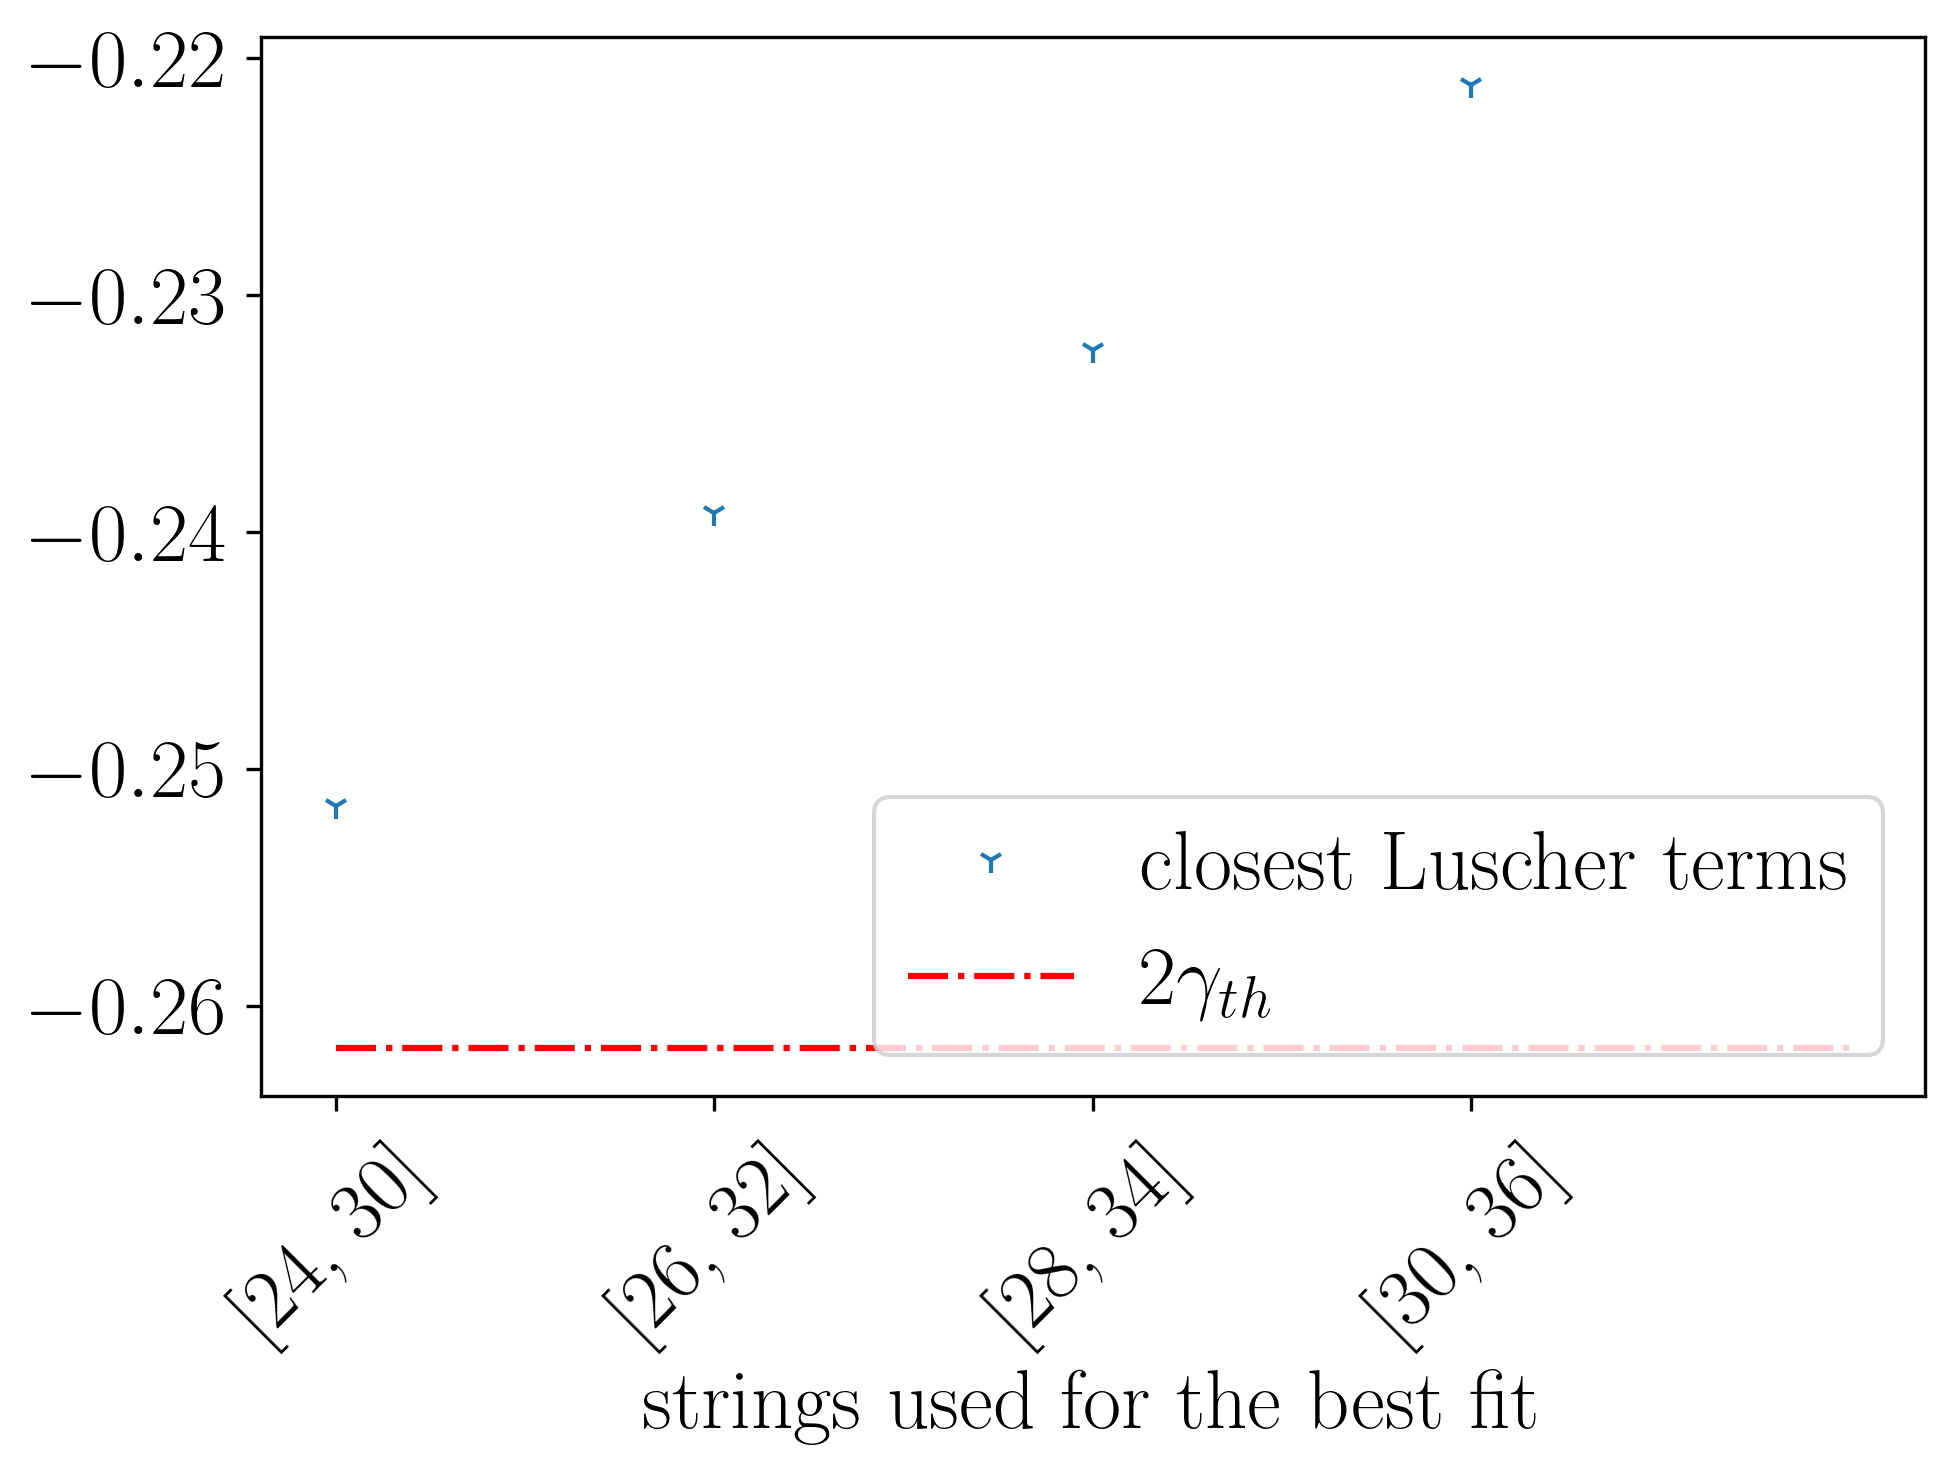

In [155]:
plt.plot(cl_vals, '1', label="closest Luscher terms")
plt.hlines(y=-np.pi/12, xmin=0, xmax=len(cl_vals), linestyles='-.', colors='r', label="$2\gamma_{th}$")
plt.xlabel("strings used for the best fit")
plt.xticks(ticks=range(len(cl_vals)), labels=cl_Rs, rotation=45)
plt.legend()
plt.savefig(f"{parent_path}/figures/fluxtube/best_luscher_terms_Z2_dual_direct_lattice_{l}x{L}_bc_{boundcond}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.png")

In [39]:
closest_index, closest_value = min(enumerate(cl_vals), key=lambda x: abs(x[1] - (-np.pi/12)))
closest_Rs = cl_Rs[closest_index]
closest_roughening = cl_gs[closest_index]
print(closest_value, closest_Rs, closest_roughening)

-0.3200827504230656 [20, 32] 0.896551724137931


In [279]:
L = 50
ratio_min = 1/5
ratio_max = 3/4
R_min = int(L*ratio_min)-1 if int(L*ratio_min)%2 != 0 else int(L*ratio_min)
R_max = int(L*ratio_max)+1 if int(L*ratio_max)%2 != 0 else int(L*ratio_max)

def get_cxs(L: int, R_min: int, R_max: int):
    assert R_min > 0, f"R_min: {R_max}, not physical, choose R_min > 0"
    assert R_max < L, f"R_max: {R_max}, exceeded the length of the lattice L: {L}"
    cxs = []
    for R in range(R_min,R_max+1)[::2]:
        print(f"R: {R}, cx: {[L//2-R//2,L//2+R//2]}")
        cxs.append([L//2-R//2,L//2+R//2])
    return cxs

## Additional study

In [208]:
L, l, chi, h_i, h_f, npoints = 20, 6, 32, 0.5, 1.5, 50
cxs = [[1,19],[2,18],[3,17],[4,16],[5,15],[6,14],[7,13],[8,12],[9,11]]
cxs = [[1,19],[2,18],[3,17],[4,16],[5,15],[6,14],[7,13]]
cxs_largest = [[1,19],[2,18],[3,17],[4,16]]
cxs_smallest = [[4,16],[5,15],[6,14],[7,13]]
# cxs = [[4,16],[5,15],[6,14],[7,13]]
chis = [16,32,64]
boundcond = "obc"

L, l, chi, h_i, h_f, npoints = 20, 6, 64, 0.8, 1.0, 30
cxs = [[1,19],[2,18],[3,17],[4,16],[5,15],[6,14],[7,13]]
cxs_largest = [[1,19],[2,18],[3,17],[4,16]]
cxs_smallest = [[4,16],[5,15],[6,14],[7,13]]
chis = [16,32]
boundcond = "obc"

# L, l, chi, h_i, h_f, npoints = 30, 6, 128, 0.8, 1.0, 30
# cxs = [[3,27],[4,26],[5,25],[6,24],[7,23],[8,22],[9,21]]
# cxs_largest = [[3,27],[4,26],[5,25],[6,24]] # largest
# cxs_smallest = [[6,24],[7,23],[8,22],[9,21]] # smallest
# boundcond = "obc"

# L, l, chi, h_i, h_f, npoints = 30, 6, 32, 0.6, 1.2, 51
# cxs = [[3,27],[4,26],[5,25],[6,24],[7,23],[8,22],[9,21]]
# cxs_largest = [[3,27],[4,26],[5,25],[6,24]] # largest
# cxs_smallest = [[5,25],[6,24],[7,23],[8,22]] # smallest
# boundcond = "obc"

# L, l, chi, h_i, h_f, npoints = 30, 6, 64, 0.8, 1.0, 30
# cxs = [[3,27],[4,26],[5,25],[6,24],[7,23],[8,22],[9,21],[10,20]]
# cxs_largest = [[3,27],[4,26],[5,25],[6,24]] # largest
# cxs_smallest = [[7,23],[8,22],[9,21],[10,20]] # smallest
# boundcond = "pbc"

L, l, chi, h_i, h_f, npoints = 40, 6, 64, 0.5, 1.5, 50
cxs = [[1,39],[2,38],[3,37],[4,36],[5,35],[6,34],[7,33],[8,32],
       [9,31],[10,30],[11,29],[12,28],[13,27],[14,26],[15,25],
       [16,24],[17,23],[18,22],[19,21]] # all
chis = [4,8,16,32,64]
cxs = [[5,35],[6,34],[7,33],[8,32],[9,31],[10,30]] # r_min = 20, r_max = 30
cxs_smallest = [[7,33],[8,32],[9,31],[10,30]]
cxs_largest = [[3,37],[4,36],[5,35],[6,34]]
# cxs_smallest = [[16,24],[17,23],[18,22],[19,21]]
# cxs_largest = [[1,39],[2,38],[3,37],[4,36]]
boundcond = "obc"

# L, l, chi, h_i, h_f, npoints = 40, 6, 128, 0.8, 1.0, 30
# cxs = [[2,38],[3,37],[4,36],[5,35],[6,34],[7,33],[8,32],[9,31],[10,30]]
# # cxs = [[6,34],[7,33],[8,32],[9,31],[10,30]]
# cxs = [[5,35],[6,34],[7,33],[8,32],[9,31],[10,30]]
# boundcond = "obc"

# L, l, chi, h_i, h_f, npoints = 40, 6, 64, 0.8, 1.0, 30
# cxs = [[4,36],[5,35],[6,34],[7,33],[8,32],[9,31],[10,30]]
# cxs_smallest = [[7,33],[8,32],[9,31],[10,30]]
# cxs_largest = [[4,36],[5,35],[6,34],[7,33]]
# boundcond = "pbc"

# L, l, chi, h_i, h_f, npoints = 50, 6, 128, 0.8, 1.0, 30
# cxs = [[7,43],[8,42],[9,41],[10,40],[11,39],[12,38],[13,37]]
# cxs_largest = [[7,43],[8,42],[9,41],[10,40]]
# cxs_smallest = [[10,40],[11,39],[12,38],[13,37]]
# boundcond = "obc"

hs = np.linspace(h_i,h_f,npoints)

In [178]:
def luscher_law(r, sigma, mu, gamma):
    return sigma*r + mu + gamma/r

def luscher_term_at_roughening(L,l,chi,h_i,h_f,npoints,cxs,cy):
    gammas = []
    for i in range(npoints):
        idxs =[i]
        stpot, rs = plot_static_potential(L,l,chi,h_i,h_f,npoints,cxs,cy,idxs, plot=False)
        plu, clu = curve_fit(luscher_law, rs, stpot)
        gammas.append(plu[2])
    
    idx_g_r = np.argmin(gammas)
    hs = np.linspace(h_i,h_f,npoints)
    return min(gammas), gammas, hs[idx_g_r]

### Plot $\gamma(g)$ for different fits

<>:2: SyntaxWarning: invalid escape sequence '\g'
<>:5: SyntaxWarning: invalid escape sequence '\g'
<>:8: SyntaxWarning: invalid escape sequence '\g'
<>:11: SyntaxWarning: invalid escape sequence '\g'
<>:2: SyntaxWarning: invalid escape sequence '\g'
<>:5: SyntaxWarning: invalid escape sequence '\g'
<>:8: SyntaxWarning: invalid escape sequence '\g'
<>:11: SyntaxWarning: invalid escape sequence '\g'
C:\Users\HP\AppData\Local\Temp\ipykernel_20052\3294494895.py:2: SyntaxWarning: invalid escape sequence '\g'
  plt.plot(hs, gammas_s, label='$\gamma(R^S,g)$')
C:\Users\HP\AppData\Local\Temp\ipykernel_20052\3294494895.py:5: SyntaxWarning: invalid escape sequence '\g'
  plt.plot(hs, gammas_l, label='$\gamma(R^L,g)$')
C:\Users\HP\AppData\Local\Temp\ipykernel_20052\3294494895.py:8: SyntaxWarning: invalid escape sequence '\g'
  plt.hlines(y=-np.pi/12, xmin=hs[0], xmax=hs[-1], linestyles='-.', colors='r', label="$2\gamma_{th}$")
C:\Users\HP\AppData\Local\Temp\ipykernel_20052\3294494895.py:11: Synta

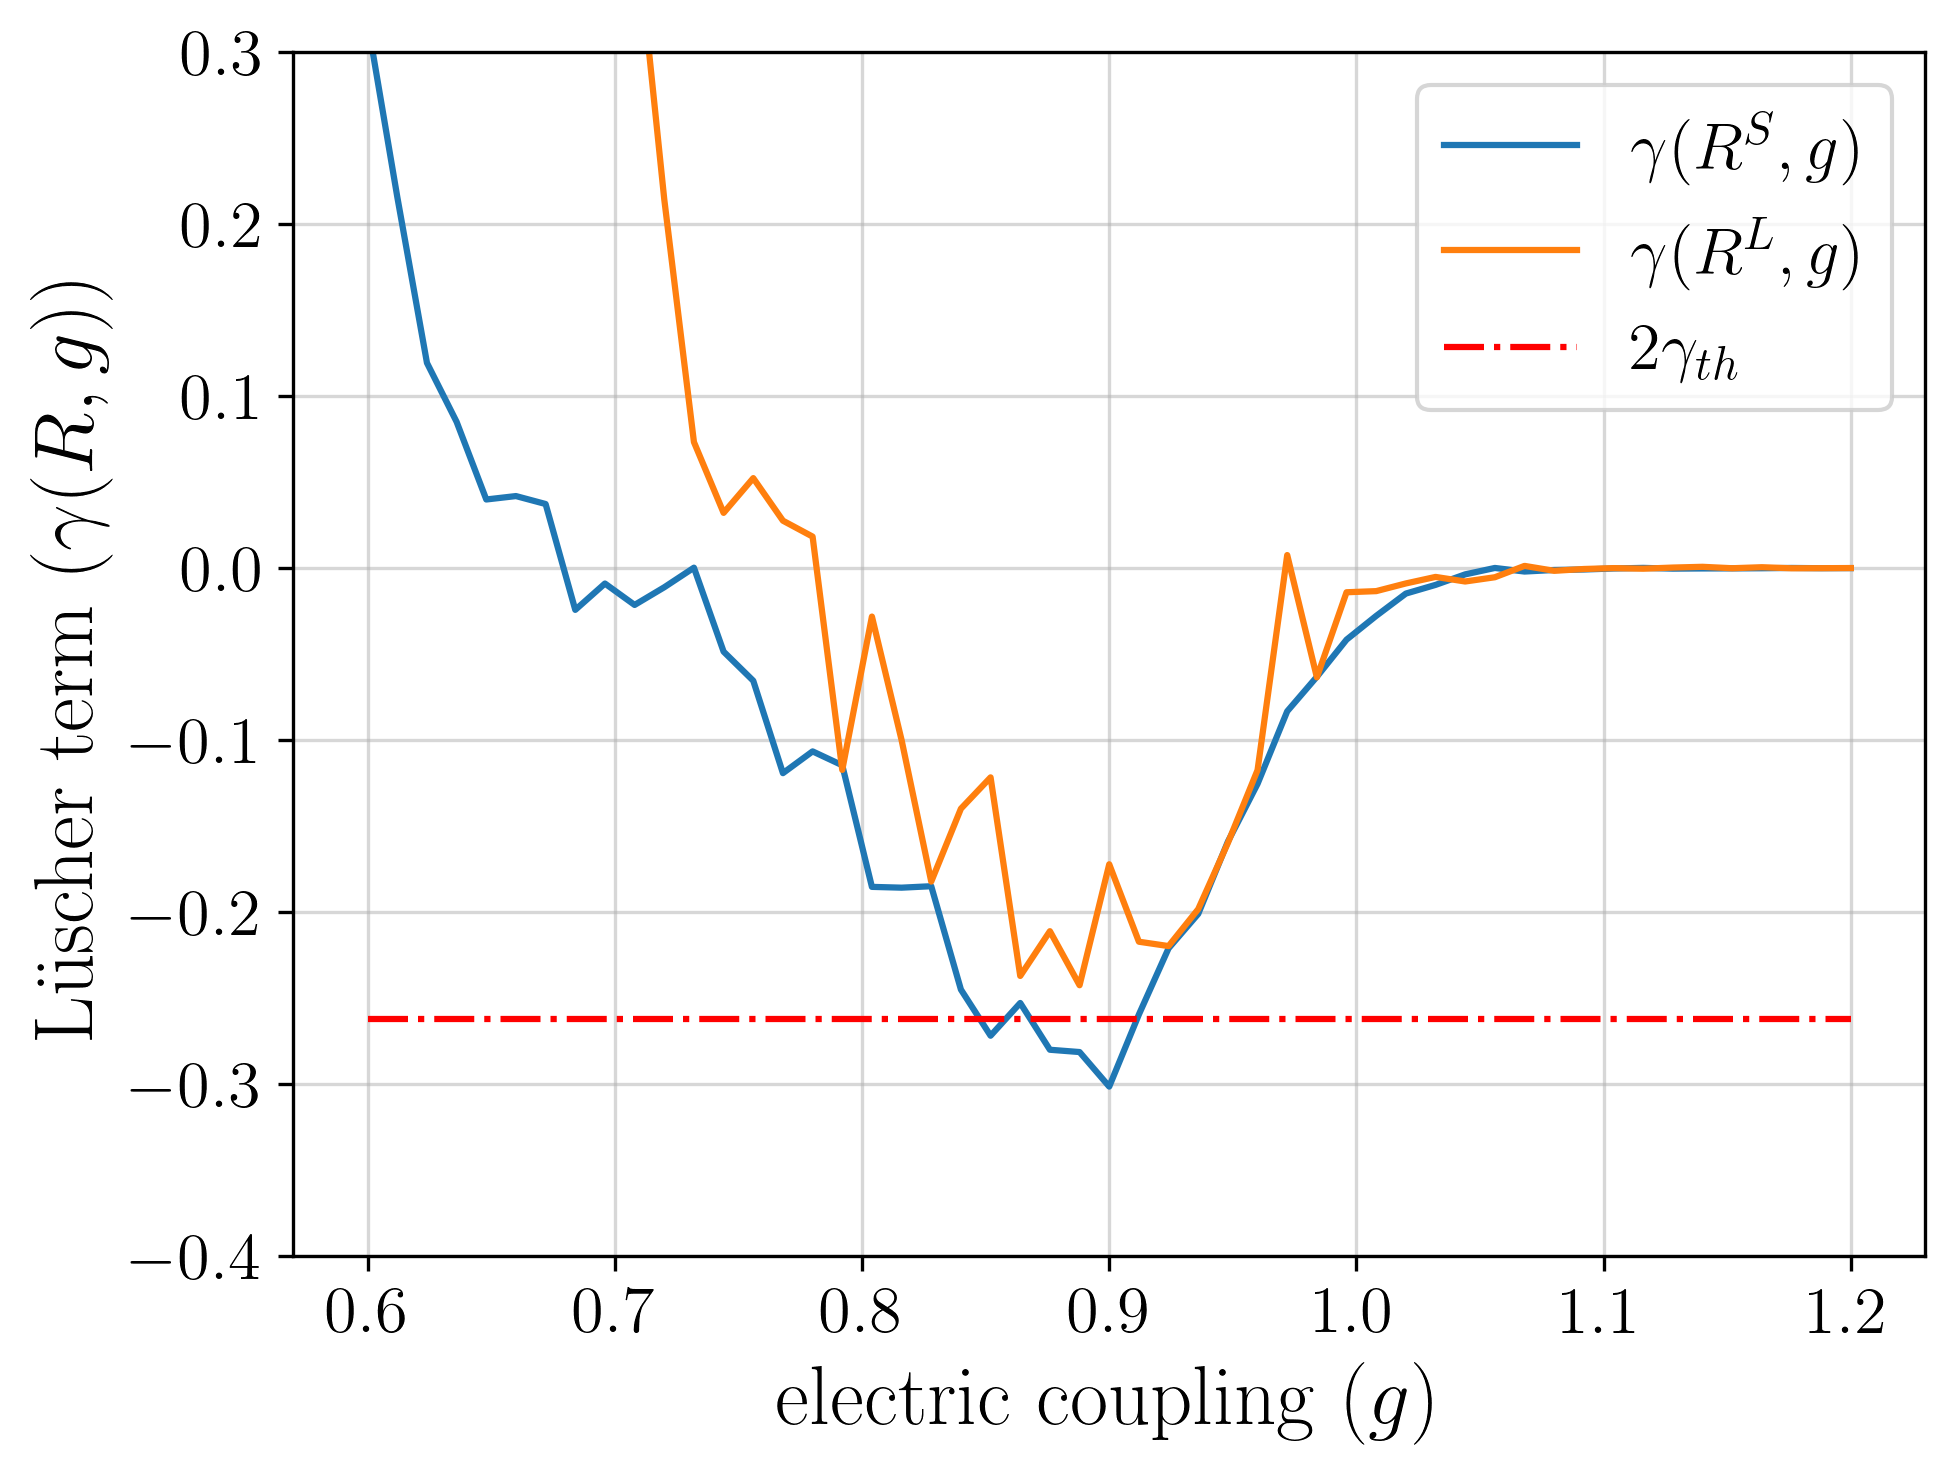

In [181]:
luscher_term, gammas_s, g_r = luscher_term_at_roughening(L,l,chi,h_i,h_f,npoints,cxs_smallest,cy)
plt.plot(hs, gammas_s, label='$\gamma(R^S,g)$')

luscher_term, gammas_l, g_r = luscher_term_at_roughening(L,l,chi,h_i,h_f,npoints,cxs_largest,cy)
plt.plot(hs, gammas_l, label='$\gamma(R^L,g)$')

# plt.hlines(y=-np.pi/24, xmin=hs[0], xmax=hs[-1], linestyles='--', colors='r', label="$\gamma_{th}$")
plt.hlines(y=-np.pi/12, xmin=hs[0], xmax=hs[-1], linestyles='-.', colors='r', label="$2\gamma_{th}$")
# plt.title(f"Lüscher Term $vs$ the $g$ coupling: $R\in[{int(cxs[-1][1]-cxs[-1][0])},{int(cxs[0][1]-cxs[0][0])}]$")
plt.xlabel("electric coupling $(g)$")
plt.ylabel("Lüscher term $(\gamma(R,g))$")
plt.grid(True, alpha=0.5)
plt.legend(fontsize=16)
plt.tick_params(axis='both', labelsize=16)
# plt.xlim((0.7,1.5))
plt.ylim((-0.4,0.3))
plt.savefig(f"{parent_path}/figures/fluxtube/luscher_term_R_large_{int(cxs_largest[-1][1]-cxs_largest[-1][0])}-{int(cxs_largest[0][1]-cxs_largest[0][0])}_R_small_{int(cxs_smallest[-1][1]-cxs_smallest[-1][0])}-{int(cxs_smallest[0][1]-cxs_smallest[0][0])}_Z2_dual_direct_lattice_{l}x{L}_bc_{boundcond}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.png")

In [152]:
min(gammas_s), hs[int(np.argmin(gammas_s))]

(-0.2515788774567589, 0.903448275862069)

### Plot $\gamma(g)$ for different bond dimension

<>:4: SyntaxWarning: invalid escape sequence '\g'
<>:7: SyntaxWarning: invalid escape sequence '\g'
<>:10: SyntaxWarning: invalid escape sequence '\g'
<>:4: SyntaxWarning: invalid escape sequence '\g'
<>:7: SyntaxWarning: invalid escape sequence '\g'
<>:10: SyntaxWarning: invalid escape sequence '\g'
C:\Users\HP\AppData\Local\Temp\ipykernel_20052\3951430309.py:4: SyntaxWarning: invalid escape sequence '\g'
  plt.plot(hs, gammas_s, color=colors[i], linewidth=1, label=f'$\gamma(R,g), \chi: {chi}$')
C:\Users\HP\AppData\Local\Temp\ipykernel_20052\3951430309.py:7: SyntaxWarning: invalid escape sequence '\g'
  plt.hlines(y=-np.pi/12, xmin=hs[0], xmax=hs[-1], linestyles='-.', colors='r', label="$2\gamma_{th}$")
C:\Users\HP\AppData\Local\Temp\ipykernel_20052\3951430309.py:10: SyntaxWarning: invalid escape sequence '\g'
  plt.ylabel("Lüscher term $(\gamma(R,g))$")


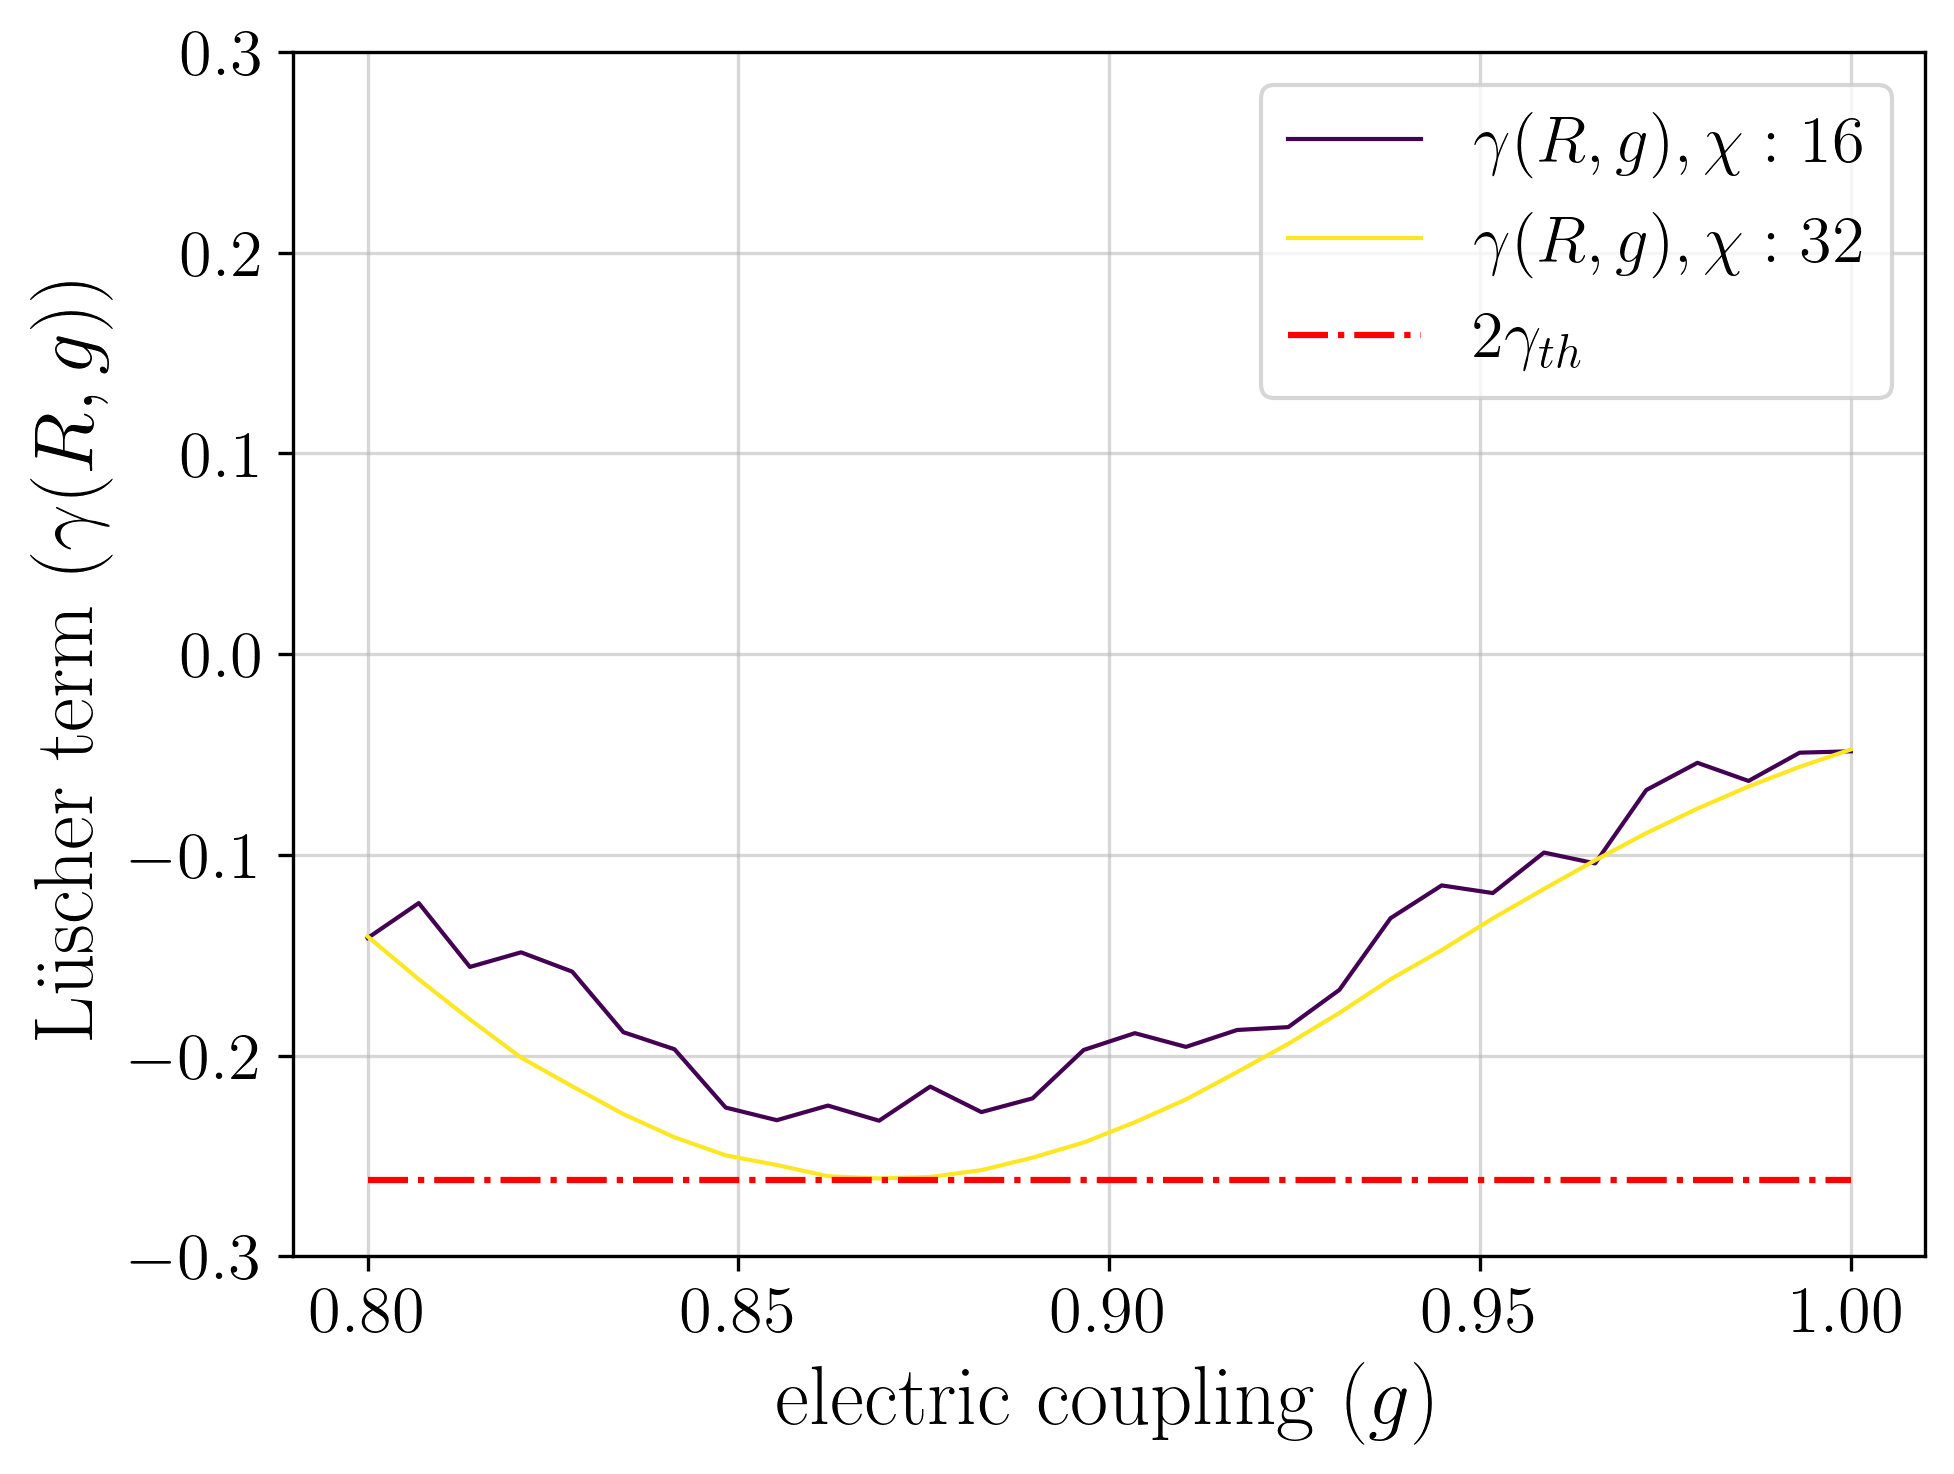

In [207]:
colors = create_sequential_colors(num_colors=len(chis))
for i, chi in enumerate(chis):
    luscher_term, gammas_s, g_r = luscher_term_at_roughening(L,l,chi,h_i,h_f,npoints,cxs,cy)
    plt.plot(hs, gammas_s, color=colors[i], linewidth=1, label=f'$\gamma(R,g), \chi: {chi}$')

# plt.hlines(y=-np.pi/24, xmin=hs[0], xmax=hs[-1], linestyles='--', colors='r', label="$\gamma_{th}$")
plt.hlines(y=-np.pi/12, xmin=hs[0], xmax=hs[-1], linestyles='-.', colors='r', label="$2\gamma_{th}$")
# plt.title(f"Lüscher Term $vs$ the $g$ coupling: $R\in[{int(cxs[-1][1]-cxs[-1][0])},{int(cxs[0][1]-cxs[0][0])}]$")
plt.xlabel("electric coupling $(g)$")
plt.ylabel("Lüscher term $(\gamma(R,g))$")
plt.grid(True, alpha=0.5)
plt.tick_params(axis='both', labelsize=16)
# plt.xlim((0.7,1.5))
plt.ylim((-0.3,0.3))
plt.legend(fontsize=16, loc='upper right')
plt.savefig(f"{parent_path}/figures/fluxtube/luscher_term_fit_R_{int(cxs[-1][1]-cxs[-1][0])}-{int(cxs[0][1]-cxs[0][0])}_different_chis_{chis}_Z2_dual_direct_lattice_{l}x{L}_bc_{boundcond}_h_{h_i}-{h_f}_delta_{npoints}.png")

### Plot $V(g,R)$ for different Bond Dimensions $\chi$

<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\c'
C:\Users\HP\AppData\Local\Temp\ipykernel_20052\1591089231.py:8: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(rs, stpot, color=colors[i], linewidth=1, label=f"$\chi: {chi}$")
C:\Users\HP\AppData\Local\Temp\ipykernel_20052\1591089231.py:12: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel("Static Potential $(V(\chi, g, R)$", fontsize=16)


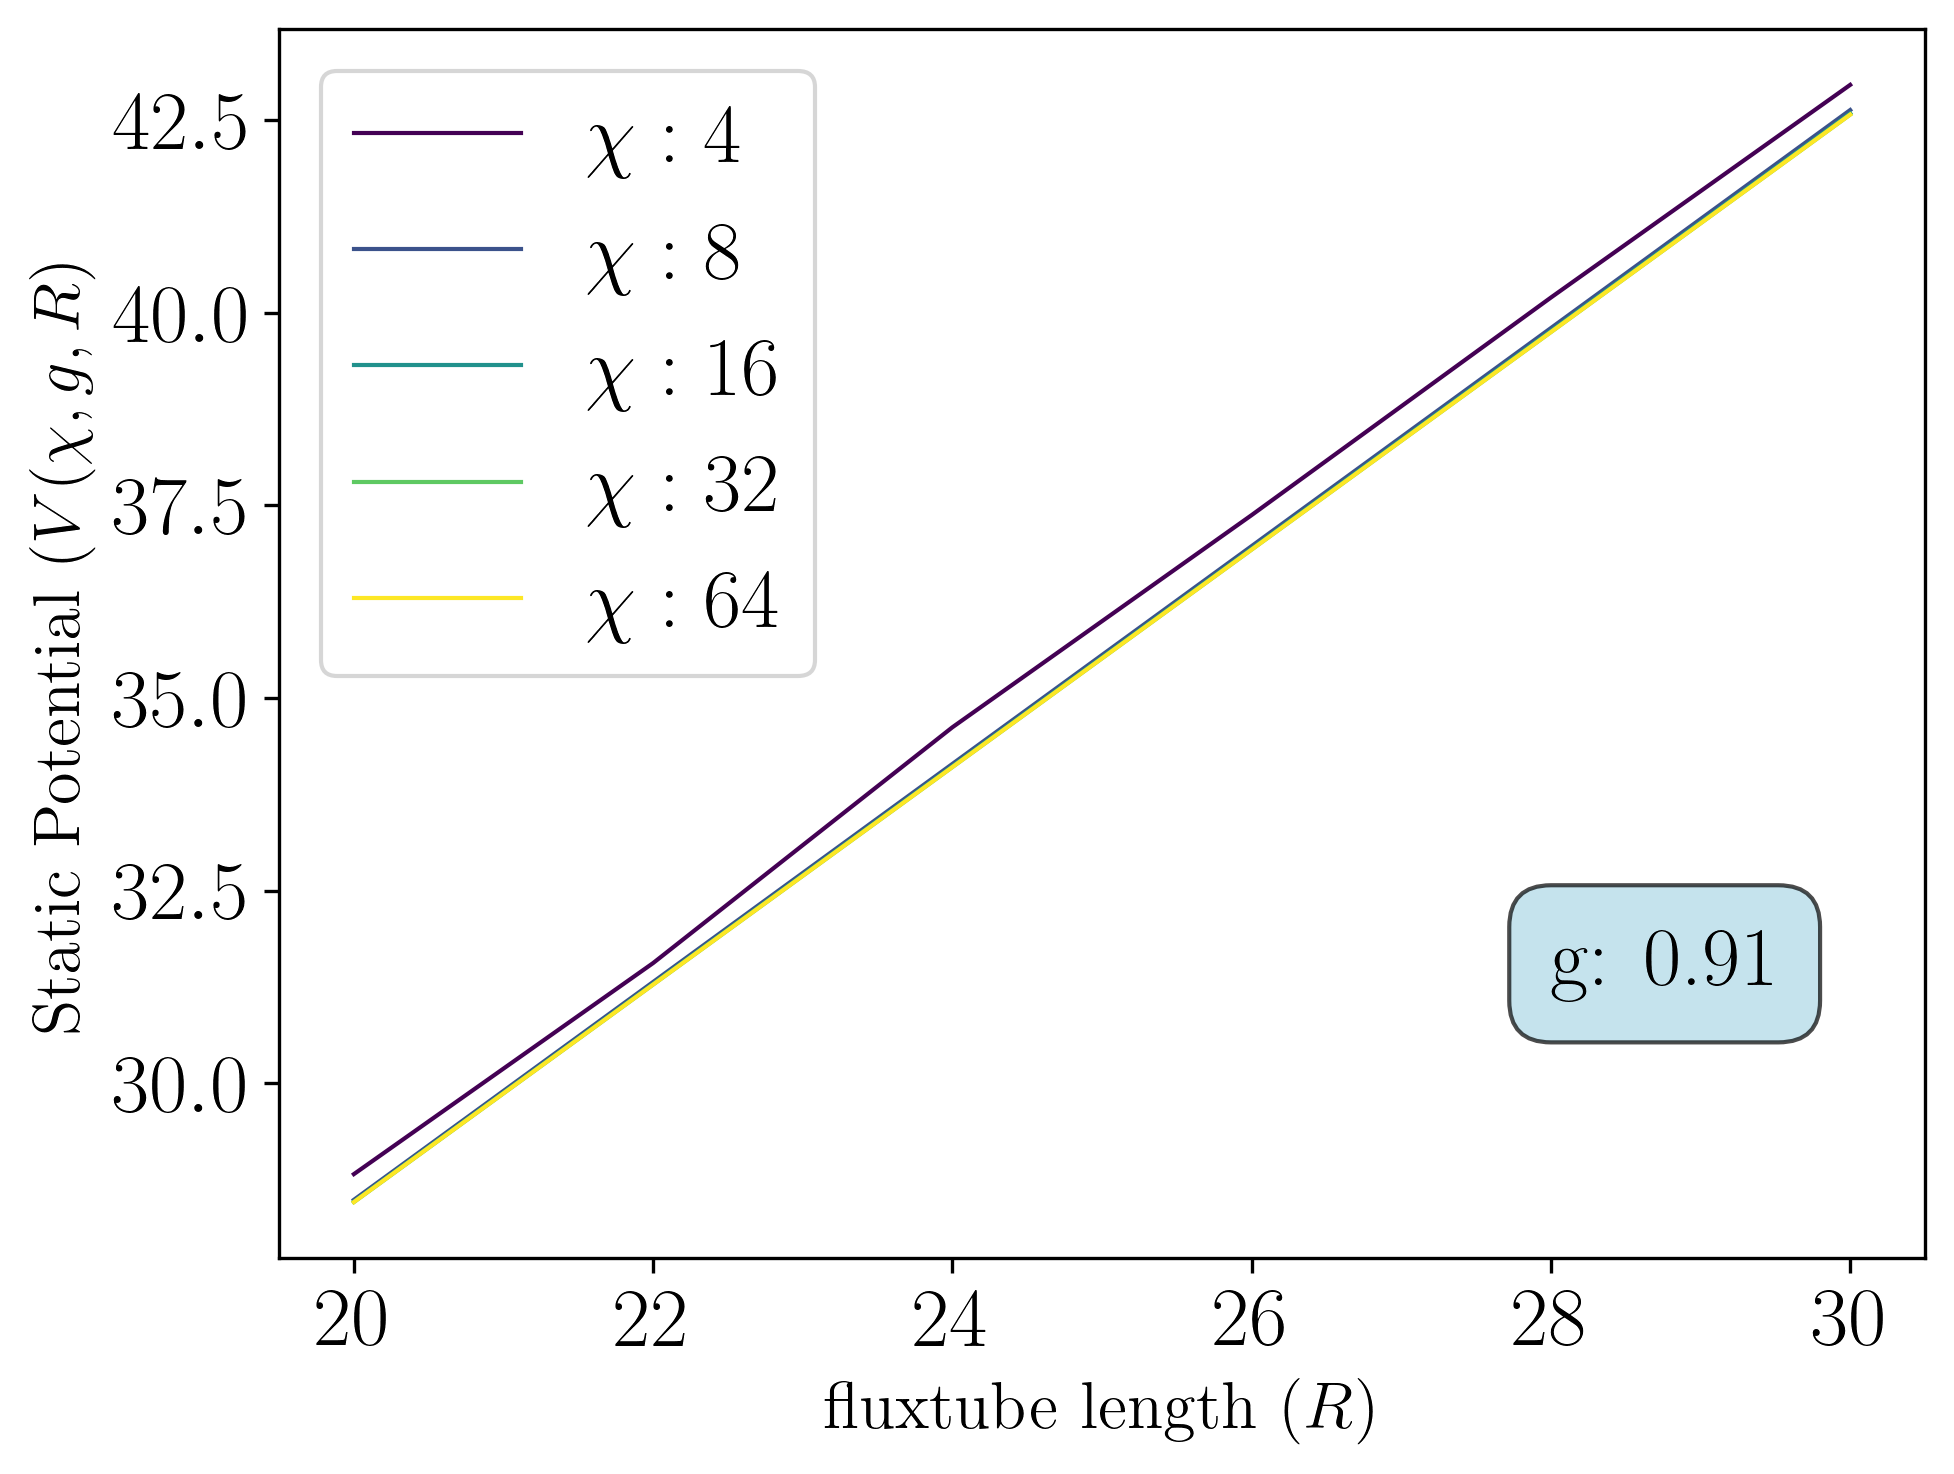

In [247]:
chis = [4,8,16,32,64]
idxs =[20]
colors = create_sequential_colors(len(chis))
i = 0
potential = []
for chi in chis:
    stpot, rs = plot_static_potential(L,l,chi,h_i,h_f,npoints,cxs,cy,idxs, plot=False)
    plt.plot(rs, stpot, color=colors[i], linewidth=1, label=f"$\chi: {chi}$")
    potential.append(stpot)
    i += 1
plt.xlabel("fluxtube length $(R)$", fontsize=16)
plt.ylabel("Static Potential $(V(\chi, g, R)$", fontsize=16)
plt.text(x=rs[1], y=stpot[-2], s=f"g: {hs[idxs[0]]:.2f}", 
         bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=0.5', alpha=0.7))

plt.legend()
plt.savefig(f"{parent_path}/figures/energy/static_potential_chis_{chis}_R_{int(cxs[-1][1]-cxs[-1][0])}-{int(cxs[0][1]-cxs[0][0])}_g_{hs[idxs[0]]:.2f}_Z2_dual_direct_lattice_{l}x{L}_bc_{boundcond}_h_{h_i}-{h_f}_delta_{npoints}.png")

<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\D'
C:\Users\HP\AppData\Local\Temp\ipykernel_20052\1198300829.py:6: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(rs, d, color=colors[i], label=f"$\Delta \chi: {chis[i]}-{chis[-1]}$")
C:\Users\HP\AppData\Local\Temp\ipykernel_20052\1198300829.py:9: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel("Static Potential difference $(\Delta V(\chi, g, R)$", fontsize=16)


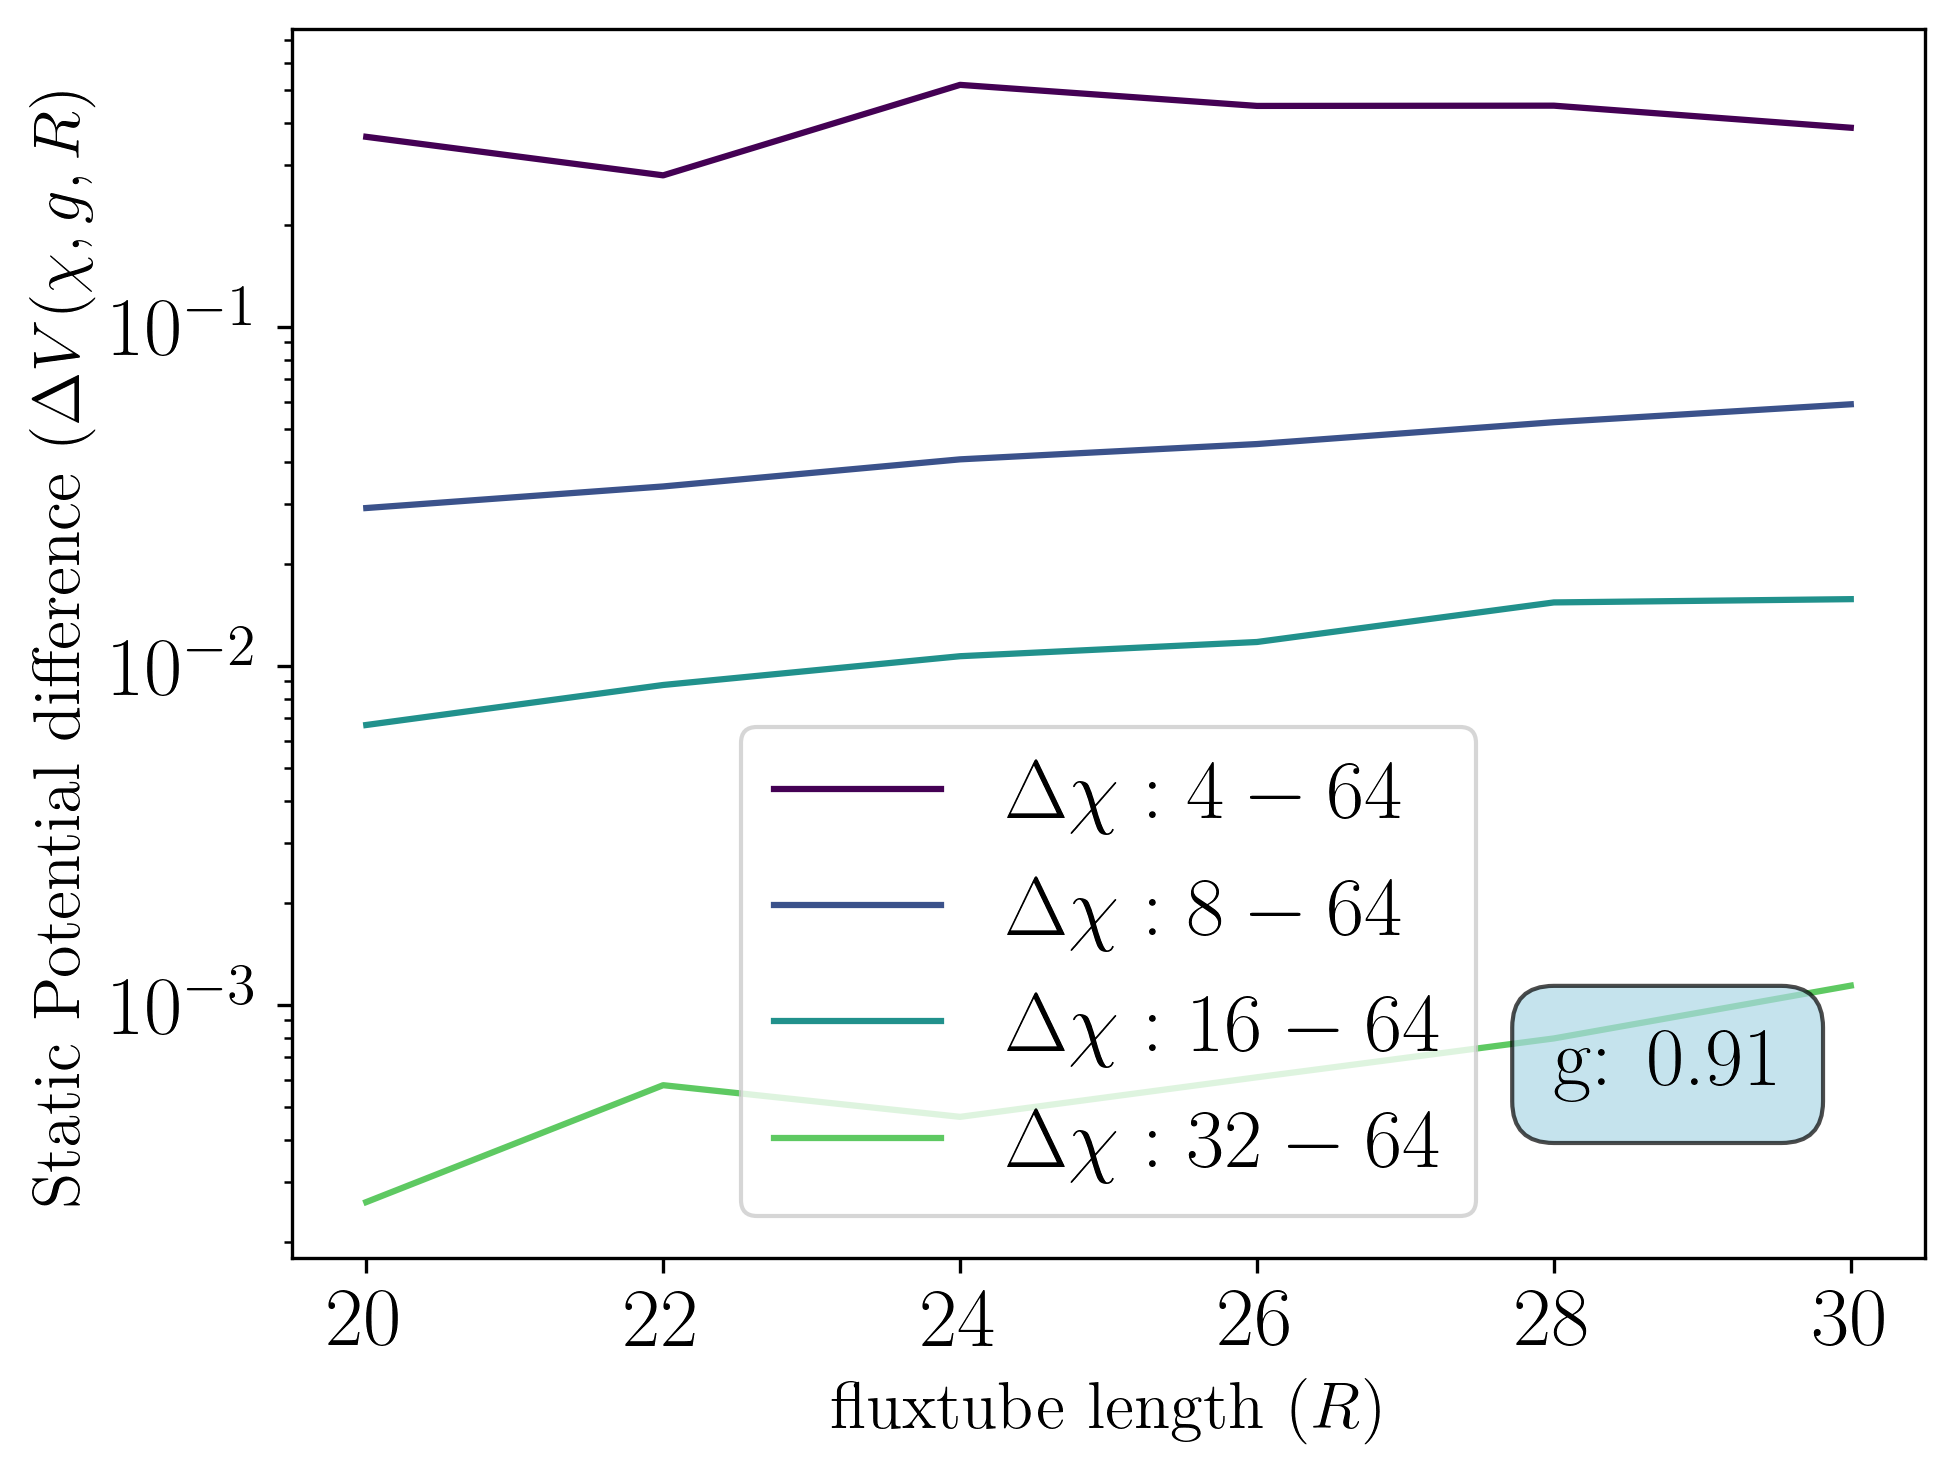

In [248]:
diff = []
for v in potential:
    diff.append(np.abs(np.asarray(potential[-1]) - np.asarray(v)))
diff.pop(-1)
for i, d in enumerate(diff):
    plt.plot(rs, d, color=colors[i], label=f"$\Delta \chi: {chis[i]}-{chis[-1]}$")
plt.yscale('log')
plt.xlabel("fluxtube length $(R)$", fontsize=16)
plt.ylabel("Static Potential difference $(\Delta V(\chi, g, R)$", fontsize=16)
plt.text(x=rs[1], y=d[-2], s=f"g: {hs[idxs[0]]:.2f}", 
         bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=0.5', alpha=0.7))

plt.legend()
plt.savefig(f"{parent_path}/figures/energy/static_potential_chis_{chis}_R_{int(cxs[-1][1]-cxs[-1][0])}-{int(cxs[0][1]-cxs[0][0])}_g_{hs[idxs[0]]:.2f}_Z2_dual_direct_lattice_{l}x{L}_bc_{boundcond}_h_{h_i}-{h_f}_delta_{npoints}.png")

### Plot $V(g,R)$ for different lattice sizes, fix $g$

In [280]:
def get_cxs(L: int, R_min: int, R_max: int):
    assert R_min > 0, f"R_min: {R_max}, not physical, choose R_min > 0"
    assert R_max < L, f"R_max: {R_max}, exceeded the length of the lattice L: {L}"
    cxs = []
    for R in range(R_min,R_max+1)[::2]:
        print(f"R: {R}, cx: {[L//2-R//2,L//2+R//2]}")
        cxs.append([L//2-R//2,L//2+R//2])
    return cxs

In [291]:
npoints, h_i, h_f, chi = 30, 0.8, 1.0, 64
# npoints, h_i, h_f, chi = 50, 0.5, 1.5, 32
R_min = 10
R_max = 16
Ls = [20,30]
cxs = [get_cxs(L,R_min,R_max) for L in Ls]
lattices = [[6,L] for L in Ls]
boundcond = "pbc"
hs = np.linspace(h_i,h_f,npoints)

R: 10, cx: [5, 15]
R: 12, cx: [4, 16]
R: 14, cx: [3, 17]
R: 16, cx: [2, 18]
R: 10, cx: [10, 20]
R: 12, cx: [9, 21]
R: 14, cx: [8, 22]
R: 16, cx: [7, 23]


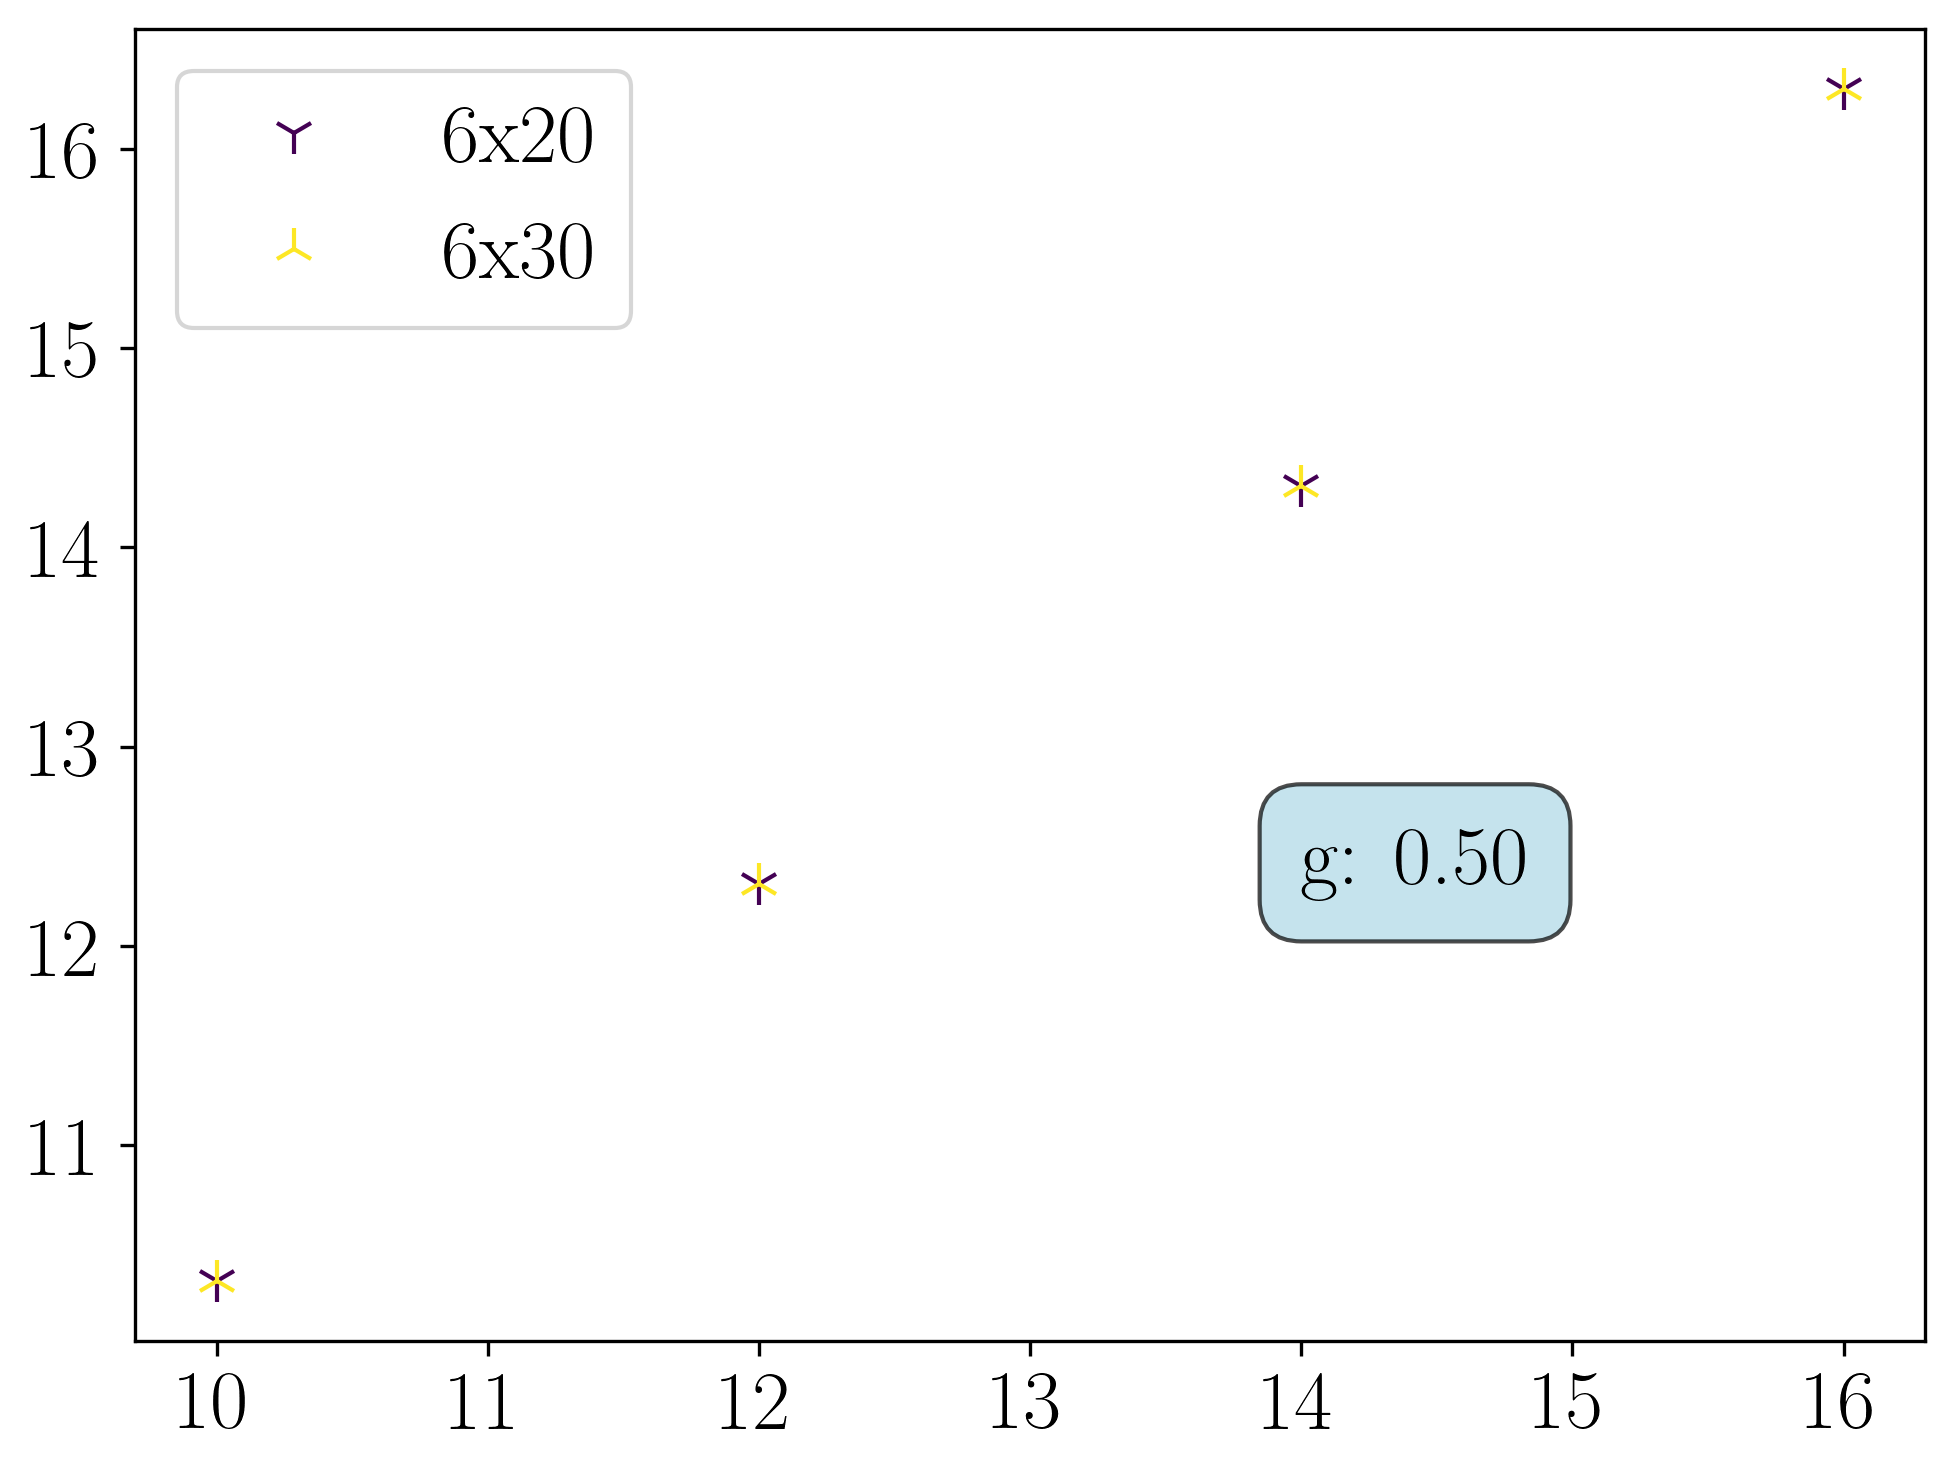

In [286]:
idxs =[0]
colors = create_sequential_colors(len(lattices))
i = 0
markers = ['1','2','3']
potential = []
for cxs_lattice, lattice in zip(cxs, lattices):
    stpot, rs = plot_static_potential(lattice[1],lattice[0],chi,h_i,h_f,npoints,cxs_lattice,cy,idxs, plot=False)
    plt.plot(rs, stpot, color=colors[i], marker=markers[i], markersize=10, linewidth=0, label=f"${lattice[0]}$x${lattice[1]}$")
    potential.append(stpot)
    i += 1
plt.text(x=rs[-2], y=stpot[1], s=f"g: {hs[idxs[0]]:.2f}", 
    bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=0.5', alpha=0.7))
plt.legend()
plt.savefig(f"{parent_path}/figures/energy/static_potential_R_{R_min}-{R_max}_g_{hs[idxs[0]]:.2f}_Z2_dual_direct_lattices_{l}x{Ls}_bc_{boundcond}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.png")

<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
C:\Users\HP\AppData\Local\Temp\ipykernel_20052\2848052152.py:6: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(rs, d, color=colors[i], label=f"$\Delta L: {lattices[i][1]}-{lattices[-1][1]}$")


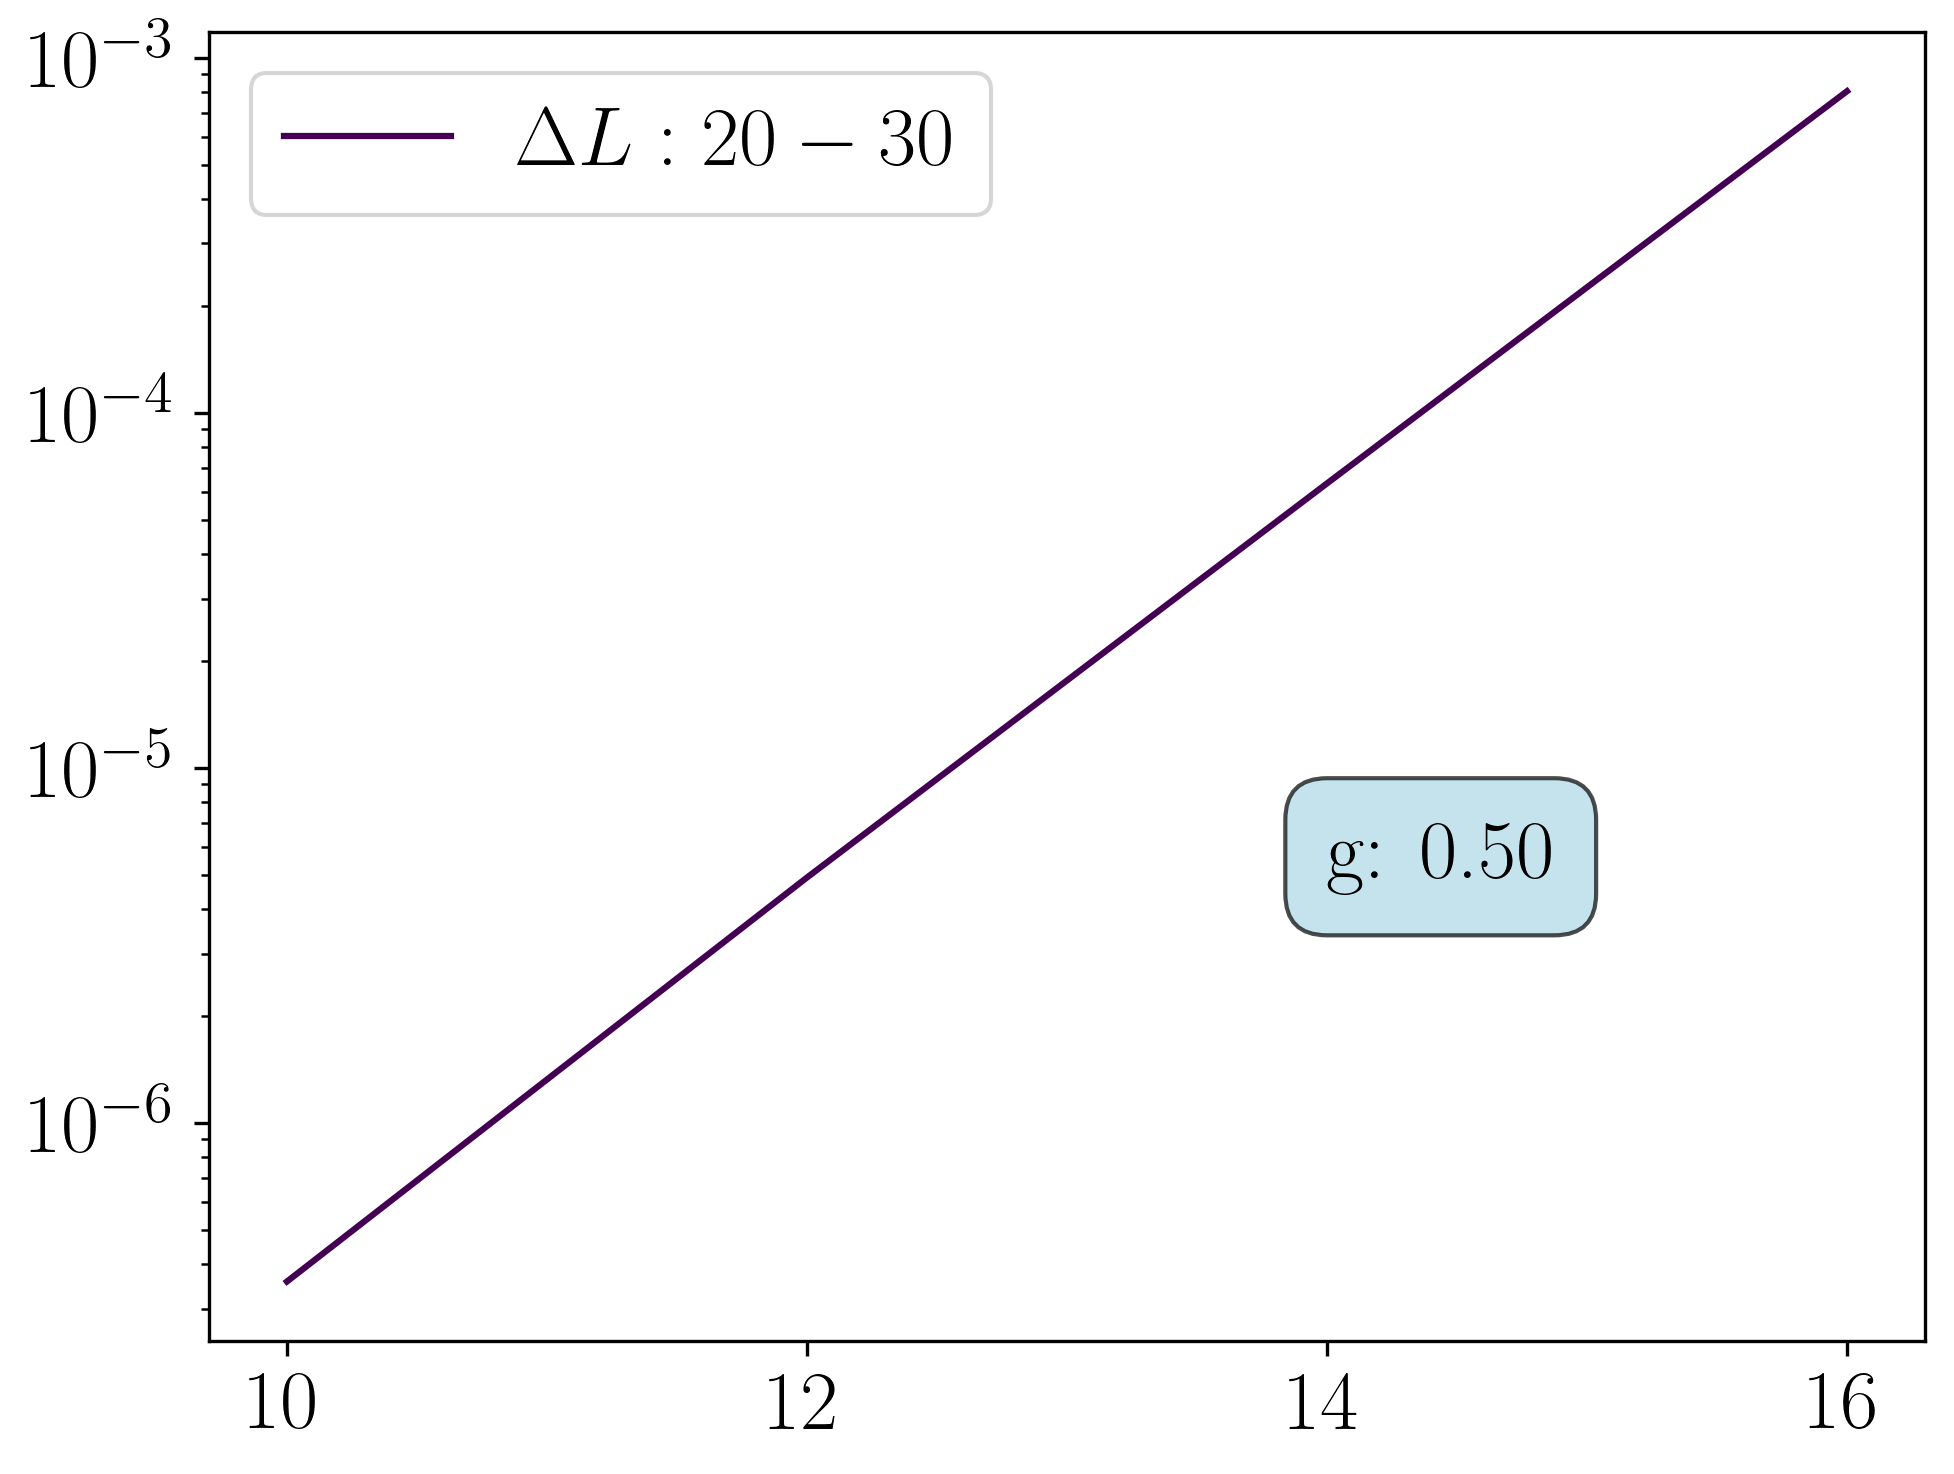

In [287]:
diff = []
for v in potential:
    diff.append(np.abs(np.asarray(potential[-1]) - np.asarray(v)))
diff.pop(-1)
for i, d in enumerate(diff):
    plt.plot(rs, d, color=colors[i], label=f"$\Delta L: {lattices[i][1]}-{lattices[-1][1]}$")
plt.yscale('log')
plt.text(x=rs[-2], y=d[1], s=f"g: {hs[idxs[0]]:.2f}", 
         bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=0.5', alpha=0.7))

plt.legend()
plt.savefig(f"{parent_path}/figures/energy/static_potential_difference_R_{R_min}-{R_max}_g_{hs[idxs[0]]:.2f}_Z2_dual_direct_lattices_{l}x{Ls}_bc_{boundcond}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.png")


### Plot $V(g,R)$ for different lattice sizes, fix $R$

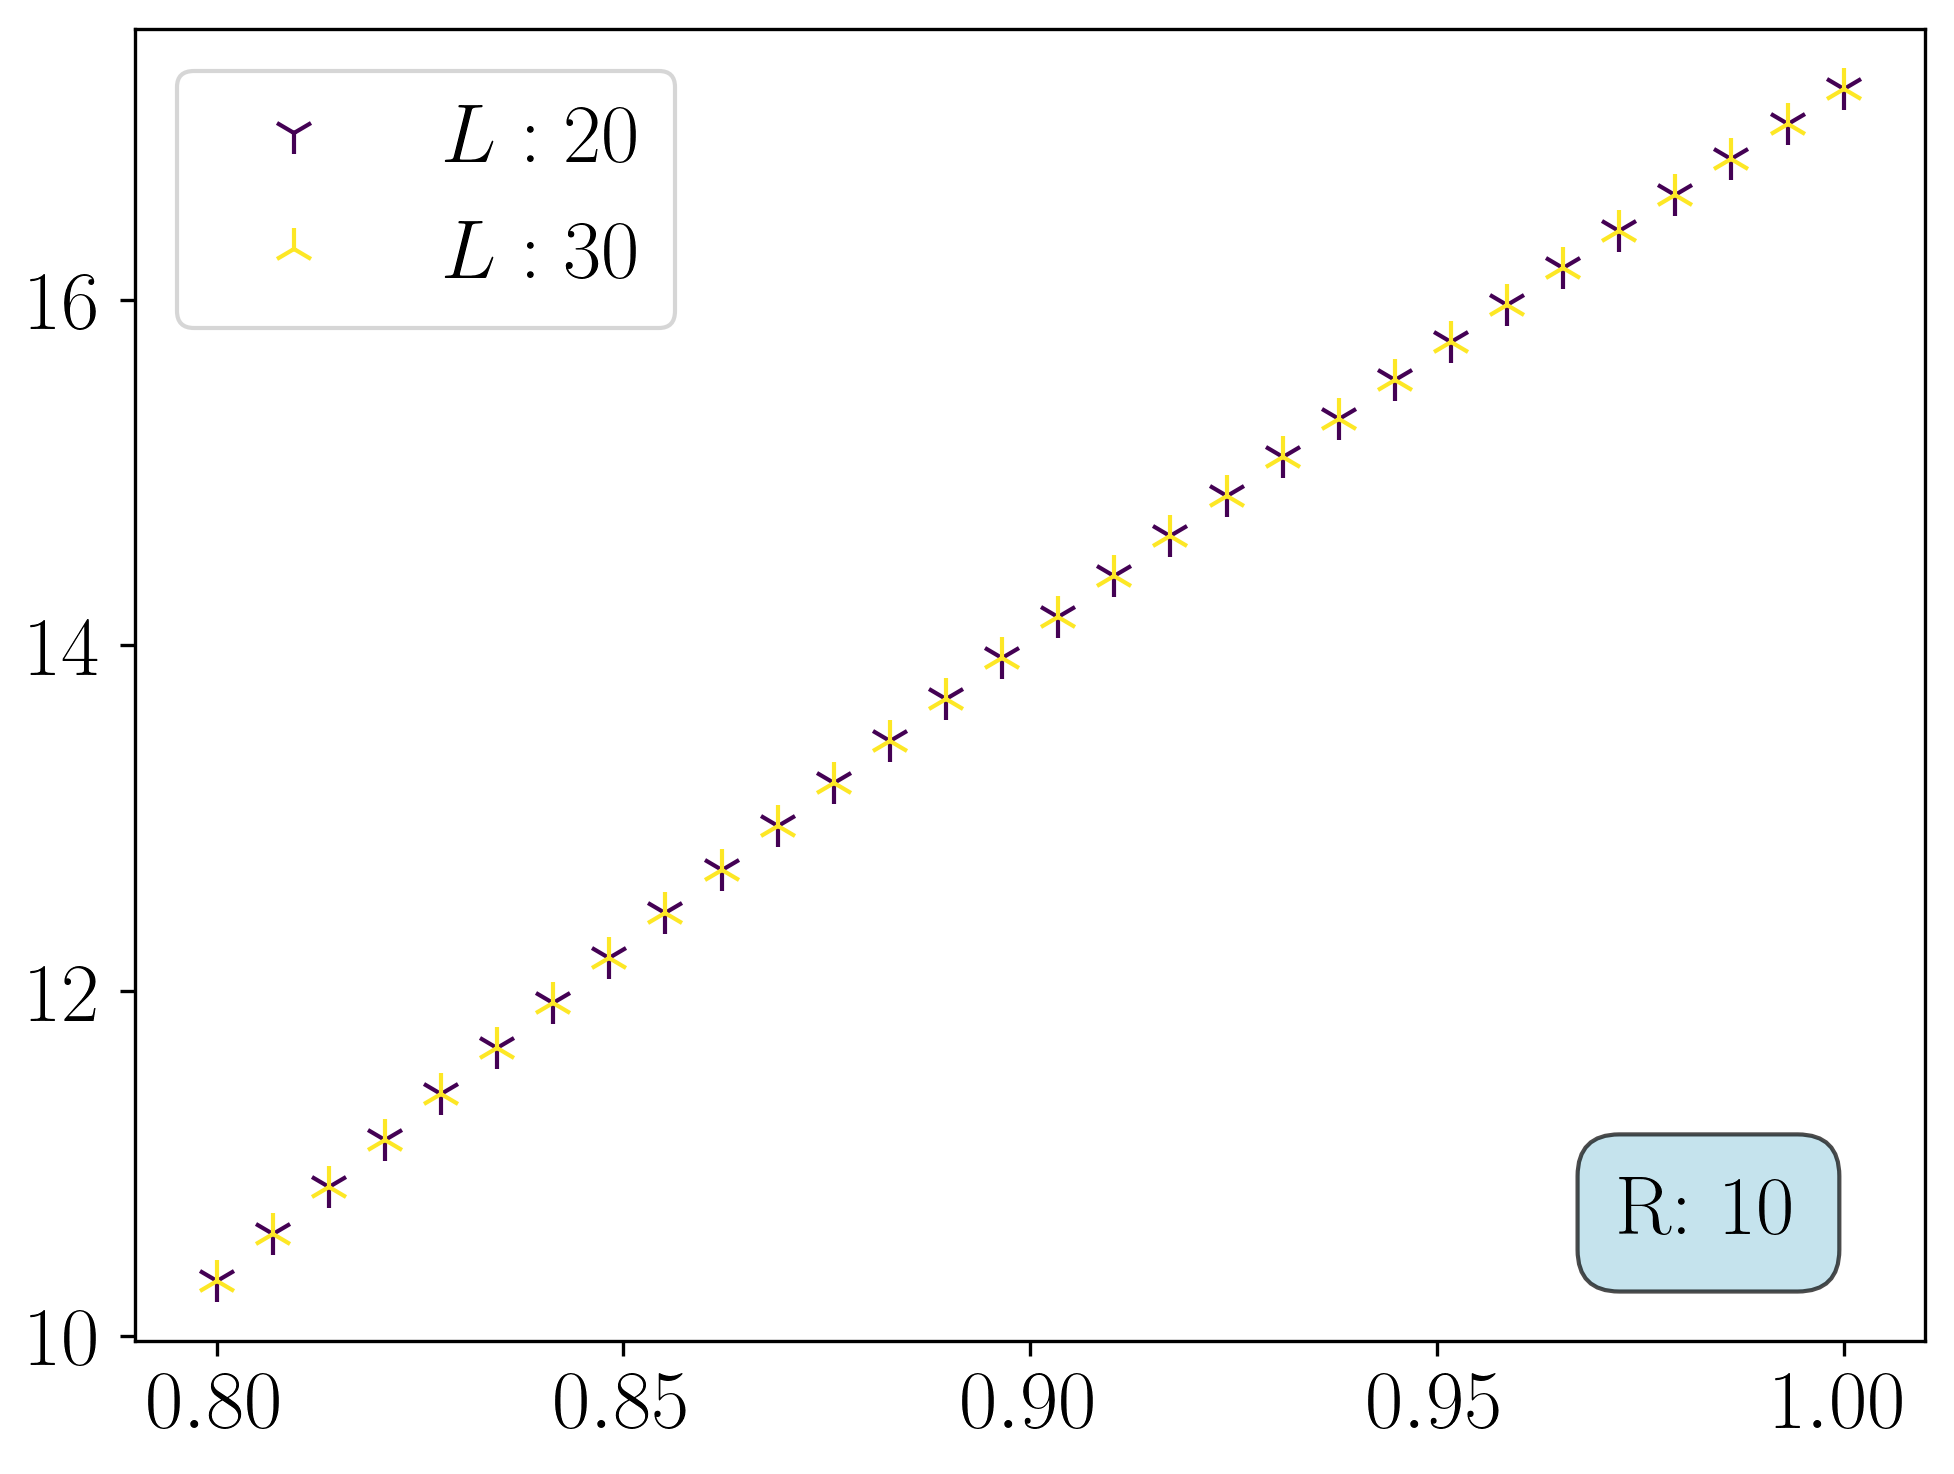

In [307]:
colors = create_sequential_colors(len(cxs))
i = 0
j = 0
markers = ['1','2','3']
potential = []
for cxs_lattice, lattice in zip(cxs, lattices):
    pot_lat = []
    for idx, g in enumerate(hs):
        idxs = [idx]
        stpot, rs = plot_static_potential(lattice[1],lattice[0],chi,h_i,h_f,npoints,cxs_lattice,cy,idxs, plot=False)
        pot_lat.append(stpot)
    potential.append(pot_lat)
    plt.plot(hs,np.asarray(pot_lat)[:,i], marker=markers[j], markersize=10, linewidth=0, color=colors[j], label=f'$L: {lattice[1]}$')
    j += 1
plt.text(x=hs[-5], y=np.asarray(pot_lat)[1,i], s=f"R: {rs[i]}", 
         bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=0.5', alpha=0.7))

plt.legend()